# **I. Import Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import pickle

# **II. Mount And Read Data**

Use this and modify the directory path for running the project on Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

*Choose between one of these datasets to run*

In [ ]:
filePath = "/content/drive/MyDrive/Final/creditcard.csv"

In [ ]:
filePath = "/content/drive/MyDrive/Final/creditcard_2023.csv"

In [ ]:
df = pd.read_csv(filePath)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
class_count = df.Class.value_counts()
print(class_count)

Class
0    284315
1       492
Name: count, dtype: int64


# **II. Mount and Read Data** (Localhost)

Use this and modify the  directory path if needed for running the project on localhost

*Choose between one of these datasets to run*

In [ ]:
filePath = "Dataset/creditcard.csv"

In [ ]:
filePath = "Dataset/creditcard_2023.csv"

In [ ]:
df = pd.read_csv(filePath)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# **III. Handle Imbalance Dataset**

Ref: https://www.youtube.com/watch?v=JnlM4yLFNuo

https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/

Select one of the following methods to run

## Way 1: Undersampling The Majority Class

***For testing purposes, we strongly recommend using Undersampling as it significantly reduces the runtime. The model will finish fitting almost immediately after clicking the Run button. However, please note that Undersampling may not provide reliable evaluation results.***

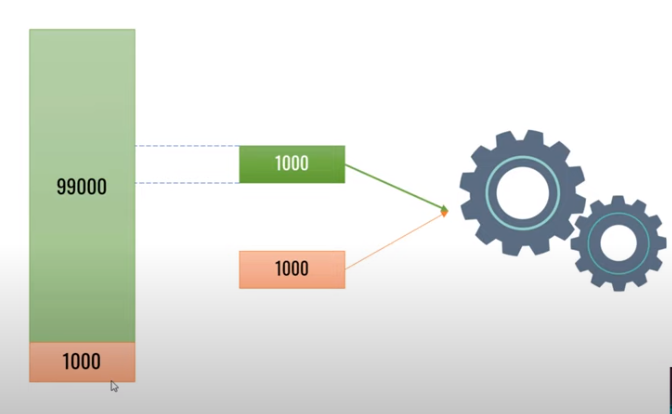

In [ ]:
df_class_0 = df[df['Class'] == 0]   # Non fraud records (The majority class)
df_class_1 = df[df['Class'] == 1]

Check their shape

In [ ]:
df_class_0.shape, df_class_1.shape

((284315, 31), (492, 31))

Now, we sample from the majority class, selecting a number of elements equal to the count in the minority class (Fraud class).

In [ ]:
df_class_0 = df_class_0.sample(df_class_1.shape[0])
df_class_0.shape

(492, 31)

Now, we gobtain a new dataset by recombining the two subsets.

In [ ]:
df = pd.concat([df_class_0, df_class_1])

Using this approach, we may be discarding a significant amount of data. The minority class contains only 492 instances, while the majority class has 284,315. This means we could potentially be disregarding up to 284,315 - 492 instances

In [ ]:
class_count = df.Class.value_counts()
print(class_count)

Class
0    492
1    492
Name: count, dtype: int64


## Way 2: Over Sampling the minority class by duplication


*Note that we must-re run the pd.read_csv to get the origin df if we ran Under Sampling before running this section*

In [ ]:
df_class_0 = df[df['Class'] == 0]  # Not fraud records
df_class_1 = df[df['Class'] == 1]

Check their shape

In [ ]:
df_class_0.shape, df_class_1.shape

((492, 31), (492, 31))

Resample the minority class (df_class_1) to have the same number of samples as the majority class (df_class_0).

In [ ]:
df_class_1 = df_class_1.sample(df_class_0.shape[0], replace=True)
df_class_1.shape

(492, 31)

The `replace=True` argument in the s`ample()` function in Python specifies whether or not the sampled elements can be repeated.

When `replace=True`, the sampling is done with replacement, meaning that the same element can be selected multiple times. This can be useful when you want to create a new DataFrame with the same number of rows as another DataFrame, even if the original DataFrame has duplicate values.

In [ ]:
df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

## Way 3 : Over Sampling using SMOTE

Ref: https://medium.com/@corymaklin/synthetic-minority-over-sampling-technique-smote-7d419696b88c

https://www.youtube.com/watch?v=XfeIBAIGCKo

 The duplication approach problem is that it leads to overfitting because the model learns from the same examples. This is when SMOTE (Synthetic minority oversampling technique) comes in, we  use Use K nearest neighbors algorithm to product synthetic samples

Fix version run time: https://stackoverflow.com/questions/76593906/how-to-resolve-cannot-import-name-missingvalues-from-sklearn-utils-param-v

In [ ]:
from imblearn.over_sampling import SMOTE

# Assume that `df` is your DataFrame and 'Class' is your target variable

# Separate the features and the target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Define the SMOTE method
smote = SMOTE(sampling_strategy='minority')

# Apply the SMOTE method
X_smote, y_smote = smote.fit_resample(X, y)

# Convert the oversampled data back into a DataFrame
df = pd.DataFrame(X_smote, columns=X.columns)
df['Class'] = y_smote

Check to see it the dataset is balance or *not*

In [ ]:
df['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

# **IV. Model Envaluation Method** (Split the data)

We divide the dataset into three subsets: **D<sub>train</sub>**, **T<sub>valid</sub>**, **D<sub>test</sub>**.

D<sub>train</sub> and T<sub>valid</sub> are used for model hyperparameter selection.

Afterwards, we combine D<sub>train</sub> and T<sub>valid</sub> to train the model with the optimized parameters selected in previous step, then we use D<sub>test</sub> to evaluate the model's performance.


Also, or this type of problem, ***our primary focus should be on the recall metric***, which is the ratio of true positives to the sum of true positives and false negatives. A high recall value is crucial as it minimizes the risk of incorrectly identifying a fraudulent transaction, thereby preventing financial loss to the banking system. In the subsequent step, we will fine-tune the model, selecting the one that performs best according to the recall metric.

To clarify the terms:

- Accuracy is the proportion of all predictions that are correct.
- Precision is the proportion of positive identifications that were actually correct.
- Recall is the proportion of actual positives that were identified correctly.

In [ ]:
scoring = 'recall' # This variale will be used accross the notebook validate hyperparameter, evaluate the models

By default in Sklearn, the recall score will **consider the value 1 as positive class**, in our case is Fraud traansaction: psklearn.metrics.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

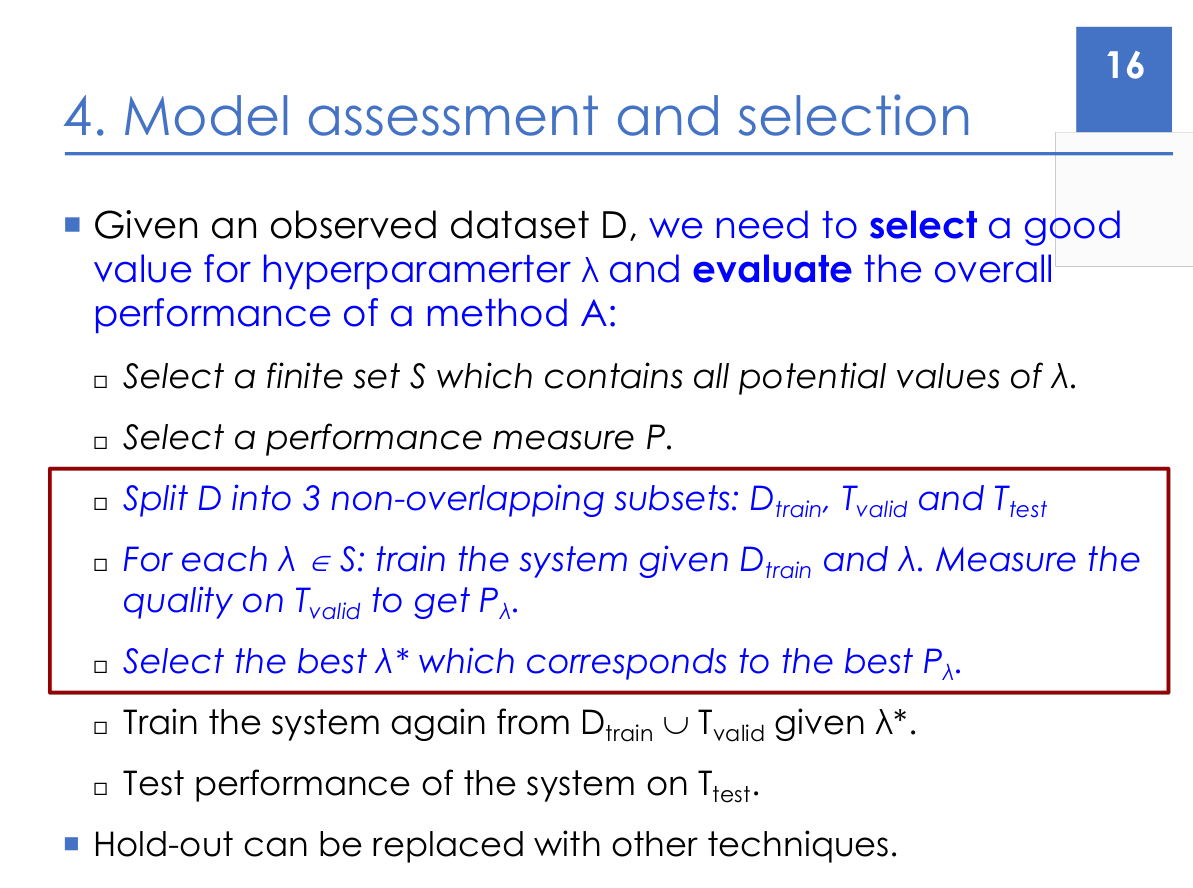

## Way 1: Split the data by hold out

In [ ]:
# Split the data into training and testing sets
D_train_temp, D_test = train_test_split(df, test_size=0.2, random_state=42)

# Split the training set into training and validation sets
D_train, T_valid = train_test_split(D_train_temp, test_size=0.25, random_state=42)

*The `random_state` parameter is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices in our case.*

*Setting `random_state` to an integer will make the output deterministic, meaning that the split will always be the same every time you run the code, which can be useful for debugging and testing. If `random_state` is None or not set, then each run of the code will produce a different random split, making the output non-deterministic.*

*The actual number you use for `random_state` doesn't matter so much, it's the consistency that's important. The number `42` is often used in examples and tutorials because of its cultural significance in fields like science and mathematics, largely due to its appearance in 'The Hitchhiker's Guide to the Galaxy' by Douglas Adams, where it's presented as "the Answer to the Ultimate Question of Life, The Universe, and Everything". But in practice, you could use any integer number.*

`D_test` will be **20%**, `D_train` will be 0.8 x 0.75 = **0.6%**, `T_valid` = 0.8 x 0.25 = **0.2%**

In [ ]:
x_train = D_train.iloc[:, :-1]
y_train = D_train.iloc[:, -1]

x_test = D_test.iloc[:, :-1]
y_test = D_test.iloc[:, -1]

x_val = T_valid.iloc[:, :-1]
y_val = T_valid.iloc[:, -1]

## Way 2: Split dataset by stratified sampling to deal with imbalance data.


In [ ]:
# 1. Split the dataset into a temporary training set and the test set
D_train_temp, D_test = train_test_split(df, test_size=0.2, stratify=df['Class'], random_state=42)

# 2. Split the temporary training set into the final training set and the validation set
D_train, T_valid   = train_test_split(D_train_temp, test_size=0.25, stratify=D_train_temp['Class'], random_state=42)

`D_test` will be **20%**, `D_train` will be 0.8 x 0.75 = **0.6%**, `T_valid` = 0.8 x 0.25 = **0.2%**

The `stratify` parameter in the `train_test_split` function from `sklearn.model_selection` is used to ensure that the distribution of classes in the training and test sets is the same as the distribution in the original dataset.

In your case, `stratify=df['Class']` means that the distribution of classes in the 'Class' column of your DataFrame `df` will be preserved in the training and test sets.

For example, if 20% of instances in your original dataset belong to Class 1 and 80% belong to Class 2, then after the split, 20% of instances in both the training set (`D_train_temp`) and the test set (`D_test`) will belong to Class 1 and 80% will belong to Class 2.



In [ ]:
x_train = D_train.iloc[:, :-1]
y_train = D_train.iloc[:, -1]

x_test = D_test.iloc[:, :-1]
y_test = D_test.iloc[:, -1]

x_val = T_valid.iloc[:, :-1]
y_val = T_valid.iloc[:, -1]

# **V. Run Modes**

For any tasks in my project that have a runtime exceeding **2 minute**, we provide an estimated runtime based on my machine's performance. The configuration we test here is Intel 1235u, no discrete GPU.

We also maintain a list to store all the models (considering only the default models from SKlearn) for comparison purposes at the end.

In [ ]:
models = {}

## **1. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

Our goal is to minmize this Cross Entropy loss function J(w, x<sub>i</sub>, y<sub>i</sub>) = $\sum_{i=1}^{n}$ - [ y<sub>i</sub> * log P<sub> y<sub>i</sub>=1</sub> + (1 - y<sub>i</sub>) * log(1 - P<sub> y<sub>i</sub>=1</sub>) ]

### 1.1 . Model Parameter Selection

#### 1.1.a Choose the threshold using AUC, ROC


Ref: https://www.youtube.com/watch?v=4jRBRDbJemM

https://www.geeksforgeeks.org/what-is-the-default-threshold-in-sklearn-logistic-regression/

https://www.youtube.com/watch?v=AOHGC1ViUEU

https://www.youtube.com/watch?v=nx0zM4gpXjk&list=RDCMUCNmlZJJLvH-aJojVd9AUHFQ&index=20

I use the **ROC** to choose the optimal **threshold** value for Logistic Regression

AUC:  0.9933482894523304


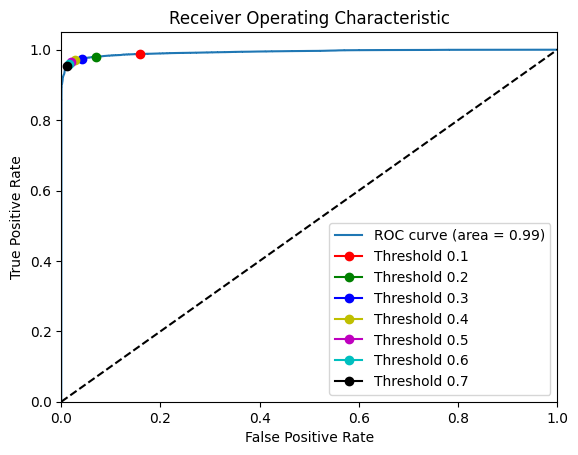

In [ ]:
from sklearn.metrics import roc_curve, auc

# Fit your logistic regression model on your training data
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

# Predict probabilities for the validation set
y_pred_prob = lr_model.predict_proba(x_val)[:,1]  # 1 indicates that we are considering Fraud as positive class

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)

# Compute the AUC
roc_auc = auc(fpr, tpr)
print('AUC: ', roc_auc)

# Define your custom thresholds
custom_thresholds = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

# Define colors for each threshold
colors = ['r', 'g', 'b', 'y', 'm', 'c', 'k']

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')

# Mark the points corresponding to the custom thresholds
for threshold, color in zip(custom_thresholds, colors):
    idx = np.abs(thresholds - threshold).argmin()
    plt.plot(fpr[idx], tpr[idx], marker='o', color=color, label=f'Threshold {threshold}')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

I will select a threshold of 0.2 as it offers high sensitivity and an acceptable False Positive rate, compared to a threshold of 0.1.

- The True Positive Rate, also known as Sensitivity (plotted on the y-axis), represents the proportion of actual positive cases (in this context, fraudulent transactions) that are correctly identified. A higher value indicates a better ability of the model to correctly classify positive instances.

- The False Positive Rate (plotted on the x-axis) refers to the proportion of negative instances that are incorrectly classified as positive out of all actual negative instances. In simple words, this is the wrong alert rate.

#### 1.1.b Choose the learning rate

To minimize the Cross Entropy function, numerous algorithms are available. However, I have implemented the simplest one, which is **Gradient Descent**.

After serveral steps of calculate the gradient of the Cross Entropy function, we obtain the final formula: w<sub>update</sub> = w - &alpha; * x<sub>i</sub> * ( y<sub>i</sub> - P<sub> y<sub>i</sub>=1</sub>).

Now we envaluate to choose the best learning rate

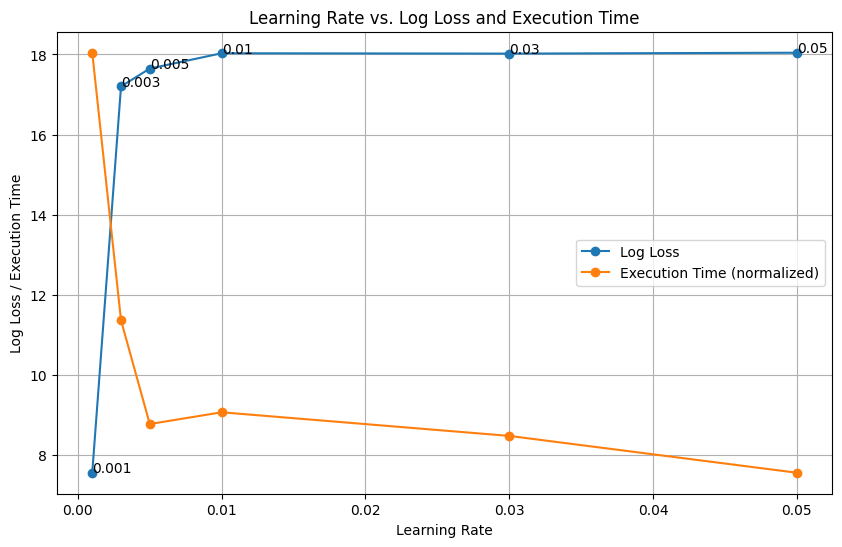

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
import time

# Define a list of learning rates
learning_rates = [0.001, 0.003, 0.005, 0.01, 0.03, 0.05]

# Initialize lists to store learning rates, log loss, and execution time
lrs = []
losses = []
times = []

# For each learning rate
for lr in learning_rates:
    # Create a SGDClassifier with 'log' loss and the current learning rate
    model = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=lr, fit_intercept=True, max_iter=5000)

    # Get the start time
    start_time = time.time()

    # Train the model using the training data
    model.fit(x_train, y_train)

    # Get the execution time
    exec_time = time.time() - start_time

    # Predict probabilities for the validation data
    y_pred_prob = model.predict_proba(x_val)

    # Calculate the log loss of the predictions
    loss = log_loss(y_val, y_pred_prob)

    # Store the learning rate, log loss, and execution time
    lrs.append(lr)
    losses.append(loss)
    times.append(exec_time)

# Normalize the execution times to the range of log loss values
times = np.interp(times, (np.min(times), np.max(times)), (np.min(losses), np.max(losses)))

# Plot learning rate vs log loss and execution time
plt.figure(figsize=(10, 6))
plt.plot(lrs, losses, marker='o', label='Log Loss')
plt.plot(lrs, times, marker='o', label='Execution Time (normalized)')

# Annotate learning rates
for i, lr in enumerate(learning_rates):
    plt.annotate(str(lr), (lrs[i], losses[i]))

plt.xlabel('Learning Rate')
plt.ylabel('Log Loss / Execution Time')
plt.title('Learning Rate vs. Log Loss and Execution Time')
plt.legend()
plt.grid(True)
plt.show()

Choose 0.03 if you need a balance between model performance and training time. Here we choose 0.001 since our train dataset is relatively small that Logistic Regression can run in less than 1 min.

*Please be aware that the plot graph may vary due to the inherent randomness in the data preprocessing and splitting processes. n that case, this is the graph we base on:*

![image.png](attachment:image.png)

From now, we union the **D<sub>train</sub>** and **T<sub>valid</sub>** to train out model and then envaluate the model performance bases on **D<sub>test</sub>**.

### 1.2 Run Model

#### **1.2.a Self Implement Model**

https://medium.com/@Coursesteach/deep-learning-part-8-05718b250906

If we choose to solve the Logistic Regression by using Graidient Descent, the formula is quite simple that we can implement our own model code:

*This model uses learning rate = 0.001, threshold = 0.2*

In [ ]:
class LogisticRegression_shopee:
    def __init__(self, learning_rate=0.001, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
      # Clip input values to be between -250 and 250
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def train(self, X, y):
        num_samples, num_features = X.shape

        # 1. Initialize weights and bias
        self.weights = np.zeros(num_features)
        self.bias = 0

        # 2. Gradient descent loop
        for i in range(self.num_iterations):
            hyperplane = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(hyperplane)

            # 3. Compute gradients
            self.weights -= self.learning_rate * np.dot(X.T, (y_predicted - y))

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i >= 0.2 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

# Usage:
lr_shopee_model = LogisticRegression_shopee()
lr_shopee_model.train(np.concatenate((x_train, x_val)), np.concatenate((y_train, y_val)))
print(classification_report(y_test,lr_shopee_model.predict(x_test),target_names=['Not fraud','Fraud']))

              precision    recall  f1-score   support

   Not fraud       0.50      1.00      0.67     56863
       Fraud       0.00      0.00      0.00     56863

    accuracy                           0.50    113726
   macro avg       0.25      0.50      0.33    113726
weighted avg       0.25      0.50      0.33    113726



The `np.clip` function is used to limit the values in an array. It takes an array as input, along with two additional parameters: a minimum value and a maximum value. It returns an array where values below the minimum are set to the minimum, and values above the maximum are set to the maximum. Values in between the minimum and maximum are left unchanged.


In the context of your logistic regression model, `np.clip` is used to prevent overflow in the `np.exp` function. If `z` is a very large negative number, `np.exp(-z)` will be a very large positive number, possibly larger than what can be represented by a float in Python, which leads to an overflow warning. By clipping `z` to be no smaller than -500, we ensure that `np.exp(-z)` will not overflow. Similarly, clipping `z` to be no larger than 500 prevents underflow (i.e., getting a result too close to zero).

Without using this np.clip, I got the warning:

```plaintext
<ipython-input-22-096801252517>:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
```

#### **1.2.b Using sklearn Logicstic Regression with Gradient Descent algorithm**

Logistic Regeression in sklearn by default do not use SGD (Stochastic Gradient Descent algorithm to solve, so there is no option for leaning_rate, by default, Logistic Regression model in Sklearn may uses lbfgs, newton-cg, liblinear,... algorithms based on specific situations to solve). To set the learning rate in the lr_model, must use the Logistic Regression with SGDCl classifier as suggested by https://datascience.stackexchange.com/questions/16751/learning-rate-in-logistic-regression-with-sklearn, so we must use SGDClassifier model from Sklearn with parameter  `SGDClassifier(loss='log_loss')` to use the Logistic regression with Gradient Descent: https://scikit-learn.org/stable/modules/sgd.html


The *fit_intercept* parameter in sklearn's LogisticRegression determines whether or not a bias or intercept term should be added to the decision function.

  In the context of logistic regression, the decision function is a linear function of the form y = wx + b, where w is the weight vector, x is the input vector, and b is the bias or intercept. This linear function is then passed through the logistic function to get the probability of the positive class.

  If fit_intercept=True, then the bias term b is included in the decision function, and the model will try to learn the best value for b along with the weights w. This is usually what you want, because the bias term allows the decision boundary to not pass through the origin. Without a bias term, the decision boundary must pass through the origin, which can limit the expressiveness of the model.

Parameter of this Logistic Regression Model: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

The `SGDClassifier` model from `sklearn` does not directly provide a way to specify the threshold for classification. By default, it uses a threshold of 0.5 for binary classification tasks.

However, you can use the `predict_proba` method to get the probabilities of the positive class, and then classify the samples based on your custom threshold. Here's how you can do it:


In [ ]:
from sklearn.metrics import classification_report
import numpy as np
from sklearn.linear_model import SGDClassifier

# Create a SGDClassifier model with the 'log' loss (logistic regression) and a learning rate of 0.003
lr_model = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=0.001, fit_intercept=True)
#lr_model.decision_function_threshold = 0.2
lr_model.fit(np.concatenate((x_train, x_val)), np.concatenate((y_train, y_val)))

# Get the probabilities of the positive class
y_pred_prob = lr_model.predict_proba(x_test)[:, 1]

# Define your custom threshold
threshold = 0.2

# Classify the samples
y_pred = (y_pred_prob >= threshold).astype(int)

# Evaluate the model
print(classification_report(y_test, y_pred, target_names=['Not fraud', 'Fraud']))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

   Not fraud       1.00      0.00      0.00     56863
       Fraud       0.50      1.00      0.67     56863

    accuracy                           0.50    113726
   macro avg       0.75      0.50      0.33    113726
weighted avg       0.75      0.50      0.33    113726



In this code, `threshold` is set to 0.2, learning rate is 0.001 . You can adjust this value based on your requirements. The `astype(int)` function is used to convert the boolean values (True/False) to binary values (1/0).

This code is creating and evaluating a logistic regression model using the Stochastic Gradient Descent (SGD) classifier from the `sklearn.linear_model` module.

Here's a breakdown of what each line does:

1. `lr_model = SGDClassifier(loss='log', learning_rate='constant', eta0=0.001, fit_intercept=True)`: This line creates an instance of the `SGDClassifier` class with specific parameters. The `loss='log'` parameter specifies that the model should use logistic regression. The `learning_rate='constant'` and `eta0=0.001` parameters together specify that the learning rate should be constant and equal to 0.001 throughout all iterations. The `fit_intercept=True` parameter specifies that the model should include an intercept term.



The result is no better than the self implement Logistic Regression Model

#### **1.2.c Use Default Logistic Regression Model**

Logistic Regression in SKlearn does not use Gradient Descent algorithm to solve so we don need the learning rate here

In [ ]:
from sklearn.linear_model import LogisticRegression
default_lr_model = LogisticRegression()
default_lr_model.fit(np.concatenate((x_train, x_val)), np.concatenate((y_train, y_val)))
print(classification_report(y_test, default_lr_model.predict(x_test), target_names=['Not fraud', 'Fraud']))

#Add the modele to the list of models
models['LR'] = default_lr_model

              precision    recall  f1-score   support

   Not fraud       0.95      0.97      0.96     56863
       Fraud       0.97      0.95      0.96     56863

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



/home/chutrunganh/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Note that regularization is applied by default as: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html suggests

Turning the threshold, by default, for binary classification is **0.5** as suggested in : https://stackoverflow.com/questions/28716241/controlling-the-threshold-in-logistic-regression-in-scikit-learn

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(np.concatenate((x_train, x_val)), np.concatenate((y_train, y_val)))
print("Result before Tuning")
print(classification_report(y_test, lr_model.predict(x_test), target_names=['Not fraud', 'Fraud']))



# Get the probabilities of the positive class
y_pred_prob = lr_model.predict_proba(x_test)[:, 1]
# Define your custom threshold
threshold = 0.2
# Classify the samples
y_pred = (y_pred_prob >= threshold).astype(int)
# Evaluate the model
print("Result after Tuning")
print(classification_report(y_test, y_pred, target_names=['Not fraud', 'Fraud']))

Result before Tuning


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

   Not fraud       0.97      0.98      0.97     56863
       Fraud       0.98      0.97      0.97     56863

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726

Result after Tuning


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

   Not fraud       0.98      0.93      0.95     56863
       Fraud       0.93      0.98      0.96     56863

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



As we predicted, the detection of fraud improves, but i trade off some other metrics decrease.

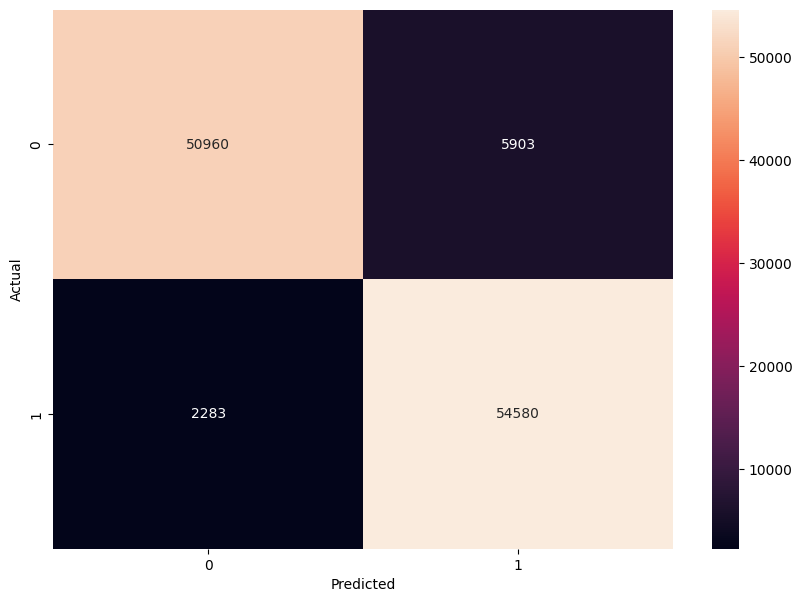

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Lowering the threshold means that you are being more lenient about classifying a transaction as fraud. This will likely increase the recall (because you are catching more of the actual fraud cases) but decrease the precision (because you are also classifying more non-fraud transactions as fraud).

There is a trade-off between precision and recall. If you want to catch more fraud cases (increase recall), you will likely also increase the number of false alarms (decrease precision). The best threshold depends on the specific costs of false positives and false negatives in your situation. If the cost of missing a fraud case (false negative) is very high, it might be worth it to lower the threshold, even if it means more false alarms.

## **2. Decision Tree**

### 2.1 Model Parameter Selection

**Purning the tree**

**To avoid Overfittig of this decision tree model, we can use two methds:**
- stop learning early (Pre-purne)
- prune the fill tree (Post-purne)

ref:  https://www.kdnuggets.com/2022/09/decision-tree-pruning-hows-whys.html

#### 2.1.a. Stop learning early

The hyperparameters that can be tuned for early stopping and preventing overfitting are: max_depth, min_samples_leaf, and min_samples_split  

These same parameters can also be used to tune to get a robust model. However, you should be cautious as early stopping can also lead to underfitting.

To build a decision tree model for credit fraud detection, you can use the `DecisionTreeClassifier` from `sklearn.tree`. Here are some steps you can take to improve your model:

**Parameter Tuning**: Decision trees have several parameters that can be tuned to improve performance. Some of these include:
   - `criterion`: parameter in the DecisionTreeClassifier determines the function to measure the quality of a split. Sklearn supports two criteria: "gini" for the Gini impurity and "entropy" for the information gain.

   - `max_depth`: The maximum depth of the tree. This is a way to control over-fitting. The deeper the tree, the more splits it has and it captures more information about the data. None means that nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

   - `min_samples_split`: The minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node.

   - `min_samples_leaf`: TThe minimum number of samples required to be at a leaf node. This parameter is similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs, the base of the tree.
   - `max_features`: : The number of features to consider when looking for the best split. If None, then max_features=n_features, set to 'sqrt', then sqrt(n_features) features are considered at each split. This is often used in Random Forests, where it helps to make the individual trees more independent of each other and thus increases the diversity of the forest
   
We use `GridSearchCV` to tune the parameters of a `DecisionTreeClassifier`:

*Since GridSearchCV will auto spilt the data we put to it into D<sub>train</sub> and D<sub>valid</sub>, we do not need to separate them, just concaternate them togrther and let GridSearchCV works on that*





Runtime ~ 7 min

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the model
dt_model = DecisionTreeClassifier()

# Define the grid of parameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 15,20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2'] #[None, 'sqrt', 'log2']
}


# Define the grid search
grid_search = GridSearchCV(dt_model, param_grid, scoring=scoring, cv=2) #scoring = 'recall' as defined in the beginning

# Fit the grid search
grid_search.fit(np.concatenate((x_train, x_val)), np.concatenate((y_train, y_val)))

# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score:  0.9982457837257971


Result:

```bash
Best parameters:  {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score:  0.9982457837257971
```


This code will try all combinations of the specified parameters, evaluate them using 2-fold cross-validation, and score them using the F1 score. The best parameters and the corresponding score are then printed. This validation is very time consumming so we just use `cv=2`, choose a higher value will increase the realiable of the envaluation.

#### 2.1.b. Post Pruning:



Pruning is a technique used to reduce the size of decision trees by removing sections of the tree that provide little power to classify instances. Pruning a decision tree can result in a smaller, simpler, and more interpretable tree, and can also help to reduce overfitting.

SKlearn DecisionTreeClassifier use CART algorithm, which come with a build-in pruning parameter named ccc_alpha (cost complexity parameter).  Greater values of ccp_alpha increase the number of nodes pruned.

Ref: https://www.geeksforgeeks.org/pruning-decision-trees/

https://scikit-learn.org/dev/auto_examples/tree/plot_cost_complexity_pruning.html

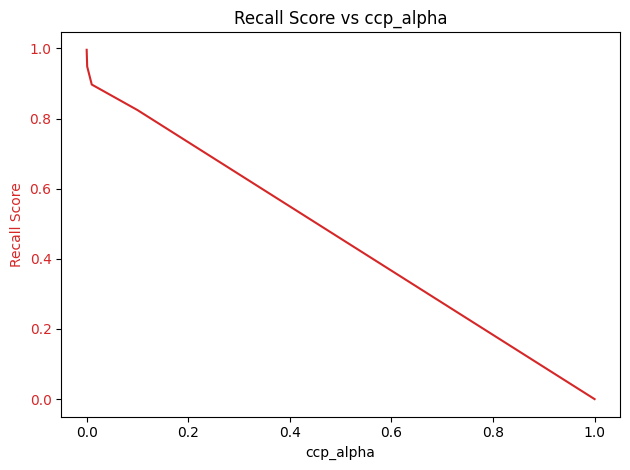

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

ccp_alphas = [0.0, 0.001, 0.01, 0.1, 1.0]

# Train a series of decision trees with different alpha values
pruned_models = []
recall_scores = []

for ccp_alpha in ccp_alphas:
    pruned_model = DecisionTreeClassifier(criterion="gini",max_depth=15, max_features="sqrt", min_samples_leaf=1,min_samples_split=10, ccp_alpha=ccp_alpha)
    pruned_model.fit(x_train, y_train)
    recall_scores.append(recall_score(y_test, pruned_model.predict(x_test)))
    pruned_models.append(pruned_model)

# Create a figure and a single axis
fig, ax = plt.subplots()

# Plot Recall score vs alpha
color = 'tab:red'
ax.set_xlabel('ccp_alpha')
ax.set_ylabel('Recall Score', color=color)
ax.plot(ccp_alphas, recall_scores, color=color)
ax.tick_params(axis='y', labelcolor=color)

# Set the title
plt.title("Recall Score vs ccp_alpha")

fig.tight_layout()
plt.show()

This is purely a demonstration where we've randomly guessed the cc_alpha list without any prior research. Also, given that the training set and the dataset are relatively small, the model is not over fitting, there may not be a need for any post-pruning in this case.

### 2.2 Run Model

#### **2.2.a ID3 Decision Tree**

The ID3 (Iterative Dichotomiser 3) algorithm is one of the earliest decision tree algorithms. It uses entropy and information gain to build a decision tree. However, Scikit-learn's `DecisionTreeClassifier` does not directly support the ID3 algorithm. It uses an optimized version of the **CART** (Classification and Regression Trees) algorithm, which is similar to ID3 but uses a different metric (Gini impurity or entropy) for splitting the nodes.

See detail here: https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart

And a  question in stackoverflow:
https://stackoverflow.com/questions/32277562/how-to-set-up-id3-algorith-in-scikit-learn

Ref: https://saturncloud.io/blog/can-we-choose-what-decision-tree-algorithm-to-use-in-scikitlearn/

If you specifically want to use the ID3 algorithm, you might need to use a different library, such as the `decision-tree-id3` package. Here's an example of how you can use it:

In [ ]:
!pip install decision-tree-id3
!pip install six
# !pip uninstall numpy
# !pip install numpy==1.21.2

import six
import sys
sys.modules['sklearn.externals.six'] = six

from id3 import Id3Estimator
from id3 import export_text

# Define the model
id3_model = Id3Estimator()

# Fit the model
id3_model.fit(x_train, y_train)

# Print the decision tree
tree = export_text(id3_model.tree_, feature_names)
print(tree)

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

However, our team has encountered several challenges while running this code.

- Initially, to execute this code, we need to install the `decision-tree-id3` package. This library is not readily available in google colab so we use `!pip install` in the code to install it.

- Howwver, this library has incompatible version issue with sklearn when it tries to use the `six` module from sklearn, which now has been deprecated :

    ```bash
    ImportError: cannot import name 'six' from 'sklearn.externals'
    ```
    I tried some solution here to fix: https://stackoverflow.com/questions/61867945/python-import-error-cannot-import-name-six-from-sklearn-externals.
    
- BAfter addressing the above issue, a new error arises:
    ```bash
    AttributeError: module 'numpy' has no attribute 'float'. np.float was a deprecated alias for the builtin float. To avoid this error in existing code, use float by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use np.float64 here. The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at: ...
    ```

    This issue arises due to an incompatible version of numpy, as suggested in: https://stackoverflow.com/questions/74844262/how-can-i-solve-error-module-numpy-has-no-attribute-float-in-python.

 #### **2.2.b Default Decision Tree**

Ref: https://scikit-learn.org/stable/modules/tree.html

Model with Tuning

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define the model with the best parameters
default_dt_model = DecisionTreeClassifier(criterion='gini', max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2)

# Fit the model to the training data
default_dt_model.fit(np.concatenate((x_train, x_val)), np.concatenate((y_train, y_val)))

print(classification_report(y_test, default_dt_model.predict(x_test), target_names=['Not fraud', 'Fraud']))

# Add the model to the list of models
models['DT'] = default_dt_model

              precision    recall  f1-score   support

   Not fraud       1.00      1.00      1.00     56863
       Fraud       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



/home/chutrunganh/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


```bash
             precision    recall  f1-score   support

   Not fraud       1.00      1.00      1.00     56863
       Fraud       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726
```

Model without Tuning

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define the model with the best parameters
dt_model = DecisionTreeClassifier()

# Fit the model to the training data
dt_model.fit(np.concatenate((x_train, x_val)), np.concatenate((y_train, y_val)))

print(classification_report(y_test, dt_model.predict(x_test), target_names=['Not fraud', 'Fraud']))

/home/chutrunganh/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

   Not fraud       1.00      1.00      1.00     56863
       Fraud       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



All statistics are 1.0, maybe the Decision Tree was born for this problem

/home/chutrunganh/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


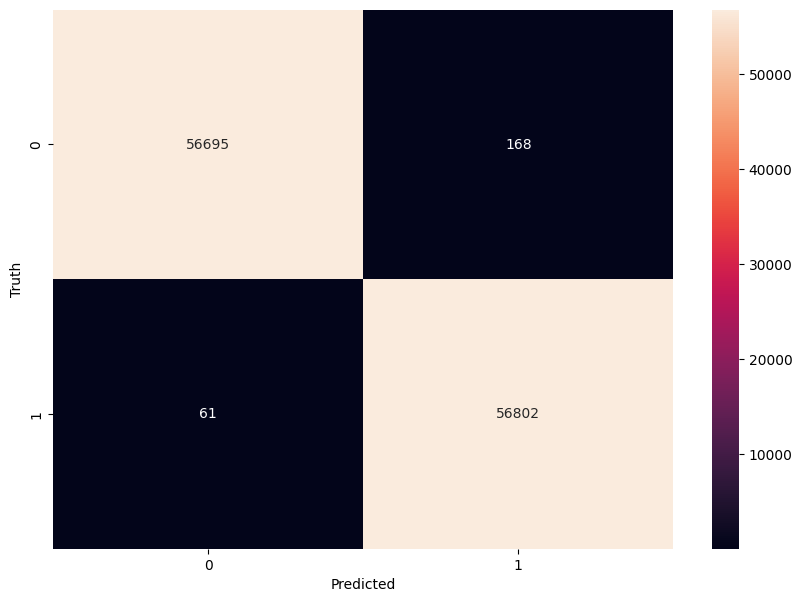

In [ ]:
cm = confusion_matrix(y_test, default_dt_model.predict(x_test))

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Plot the tree

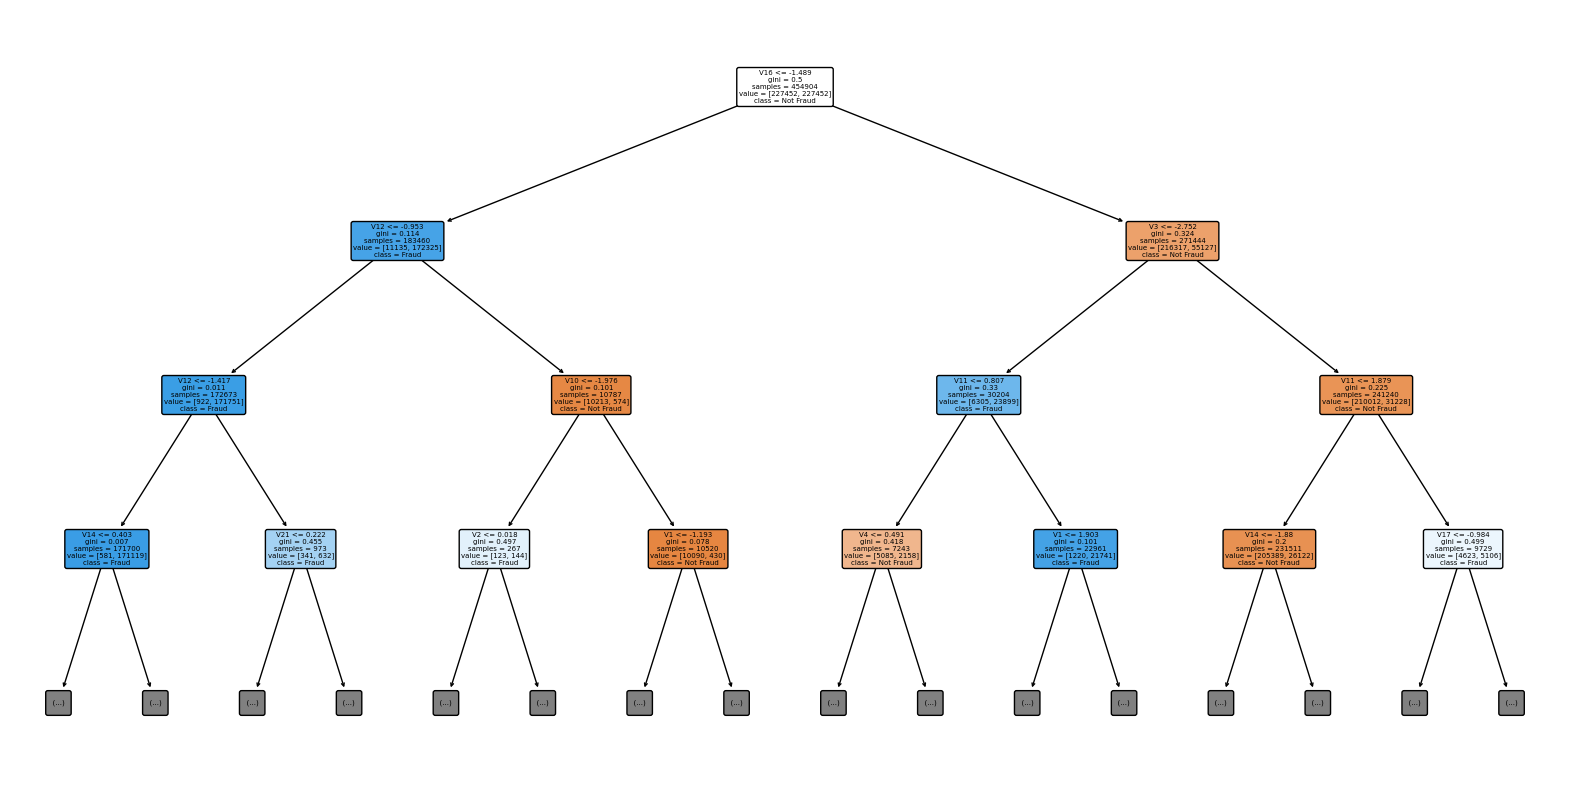

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(default_dt_model, filled=True, rounded=True, class_names=['Not Fraud','Fraud'], feature_names=x_train.columns, max_depth=3)
plt.show()


## **3. Random Forest**

### 3.1 Model Parameter Selection

We select the optimal number of trees based on the training time. By default, RandomForest in Sklearn uses 100 trees, which we believe is more than necessary for our need.

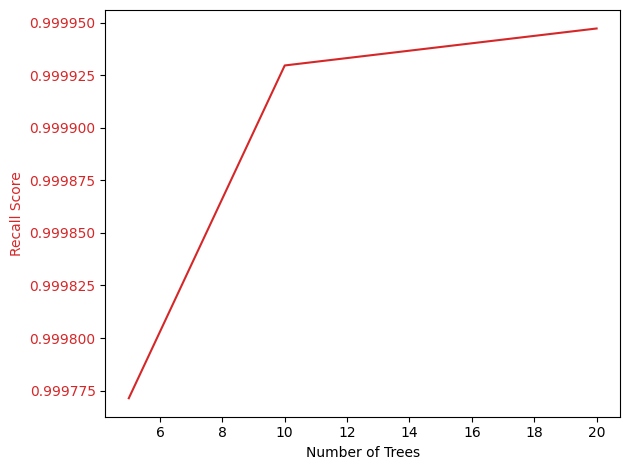

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Lists to store the results
num_trees = []
recall_scores = []

# Define the number of trees to test
tree_counts = [5, 10, 20]

# Loop over the tree counts
for count in tree_counts:
    # Create and train the model
    rf_model = RandomForestClassifier(n_estimators=count,)
    rf_model.fit(x_train, y_train)

    # Predict the test set results
    y_pred = rf_model.predict(x_val)

    # Calculate the recall score
    recall = recall_score(y_val, y_pred)

    # Store the results
    num_trees.append(count)
    recall_scores.append(recall)

# Plot the results
fig, ax = plt.subplots()

color = 'tab:red'
ax.set_xlabel('Number of Trees')
ax.set_ylabel('Recall Score', color=color)
ax.plot(num_trees, recall_scores, color=color)
ax.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

The number of trees correlates with the Recall score, but the difference is quite minimal, less than 0.0001 in the Recal score axis. Therefore, I choose the number of trees that results in less training time.

### 3.2 Run Model

In this section, we will implement two models of Random Forest.  

- The first model will be based on the theoretical concepts discussed earlier to help us understand how it works, which we will manually perform bootstrap sampling, build decision trees, and aggregate their predictions.  

- The second model will use the default Random Forest implementation provided by scikit-learn.

#### **3.2.a Ensmeble Randoms Forest**

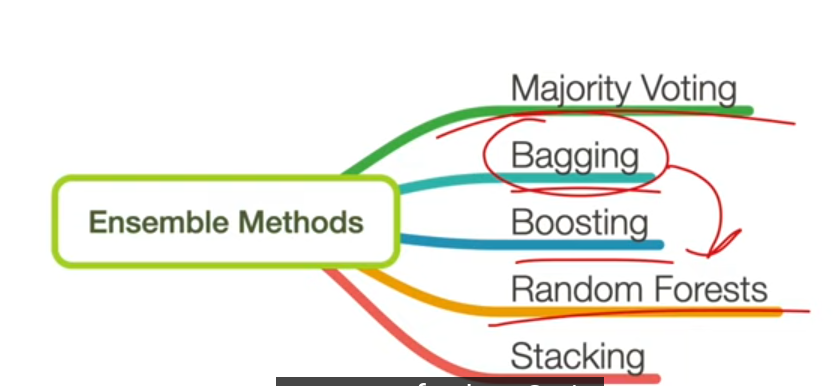

Ref: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://www.youtube.com/watch?v=r5C3TUIw6Zk

https://medium.com/@ilyurek/ensemble-learning-random-forests-bagging-random-subspace-and-boosting-713c7dbe6823

Ref: Slide 26 lecture 8 by Than Quang Khoat:

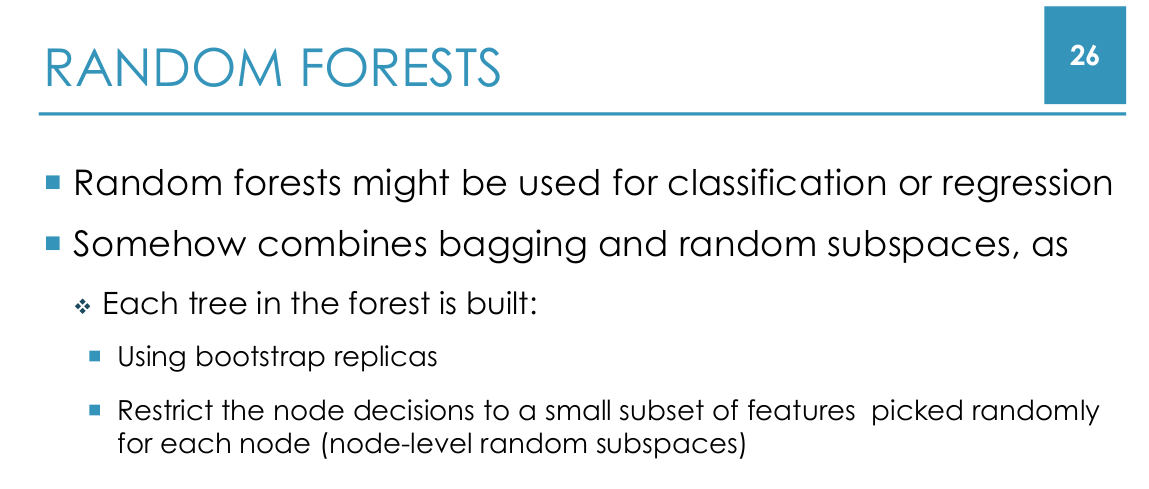



Random Forest somehow combines bagging and random subspaces, as each tree in the forest is built:
-  Using bootstrap replicas
-  Restrict the node decisions to a small subset of features picked randomly
for each node (node-level random subspaces)
-   Majority voting to get the final prediction from many decision trees

The Random Forest model, with bootstrap, is highly efficient for this problem. It performs exceptionally well even with a highly imbalanced dataset. To illustrate this, I will re-read the dataset to acquire the original data, without any imbalance processing. After running the model, we still achieve approximately 90% accuracy. If we incorporate imbalance processing, all statistics will reach 100%.

In [ ]:
#Re read df to get original dateset
df = pd.read_csv(filePath)
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [ ]:
# BootStrap
bootstrap_samples = []

# Create 3 bootstrap samples
for i in range(3):
    bootstrap_sample = df.sample(n=len(df), replace=True)
    bootstrap_samples.append(bootstrap_sample)

# Now bootstrap_samples contains your 3 bootstrap samples

Train three individual decision trees

In [ ]:
# With each bootstrap sample, build a decision tree with randomsubspace:
from sklearn.tree import DecisionTreeClassifier

# Assuming 'Class' is your target column
target = 'Class'

# List to store the models and their predictions
dt_models = []
predictions = []
count = 1

# Train a Decision Tree model on each bootstrap sample
for sample in bootstrap_samples:
    X = sample.drop(target, axis=1)
    y = sample[target]

    # Define the model
    dt_model = DecisionTreeClassifier(max_features='sqrt') # Random subspace

    # Fit the model
    dt_model.fit(X, y)

    # Store the model
    dt_models.append(dt_model)

    # Make predictions on the test set and store them
    y_pred = dt_model.predict(x_test)
    predictions.append(y_pred)

    print("Tree " + str(count) + " is trained")
    count += 1
    print(classification_report(y_test, y_pred, target_names=['Not fraud', 'Fraud']))
    print()

Tree 1 is trained
              precision    recall  f1-score   support

   Not fraud       1.00      1.00      1.00     56863
       Fraud       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726


Tree 2 is trained
              precision    recall  f1-score   support

   Not fraud       1.00      1.00      1.00     56863
       Fraud       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726


Tree 3 is trained
              precision    recall  f1-score   support

   Not fraud       1.00      1.00      1.00     56863
       Fraud       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg      

In [ ]:
# Print the predictions of each decision tree
for i, y_pred in enumerate(predictions):
    print(f"Predictions of decision tree {i+1}: {y_pred}")

Predictions of decision tree 1: [1 1 0 ... 1 1 1]
Predictions of decision tree 2: [1 1 0 ... 1 1 1]
Predictions of decision tree 3: [1 1 0 ... 1 1 1]


Now, we combine the result from decision tree using majority voting

- If vote1 + vote2 + vote3 = 1 means there are two 0 and only one 1 -> final result is 0
- If vote1 + vote2 + vote3 = 2 means there are two 1 and only one 0 -> final result is 1


In [ ]:
final_result_list = []
for j in range(len(predictions[0])): #take len of the first y_pred
  n_ones = predictions[0][j] +  predictions[1][j]   + predictions[2][j]
  if n_ones > 1:
      final_result = 1
  else:
      final_result = 0
  final_result_list.append(final_result)

Make the report

In [ ]:
# Convert the final result list to a numpy array
final_predictions = np.array(final_result_list)

# Generate a classification report for the final predictions
report = classification_report(y_test, final_predictions, target_names=['Not fraud', 'Fraud'])

print("Final Classification Report: \n", report)

Final Classification Report: 
               precision    recall  f1-score   support

   Not fraud       1.00      1.00      1.00     56863
       Fraud       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



#### **3.2.b Default random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the model
default_rf_model = RandomForestClassifier(n_estimators=5, max_features='sqrt')

# Fit the model
default_rf_model.fit(np.concatenate((x_train, x_val)), np.concatenate((y_train, y_val)))

# Predict the test set results
y_pred = default_rf_model.predict(x_test)

# Generate a classification report
report = classification_report(y_test, y_pred, target_names=['Not fraud', 'Fraud'])

print("Classification Report: \n", report)

# Add the model to the list of models
models['RF'] = default_rf_model

Classification Report: 
               precision    recall  f1-score   support

   Not fraud       1.00      1.00      1.00     56863
       Fraud       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



/home/chutrunganh/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


```plaintext
Classification Report:
               precision    recall  f1-score   support

   Not fraud       1.00      1.00      1.00     56863
       Fraud       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726
```

/home/chutrunganh/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


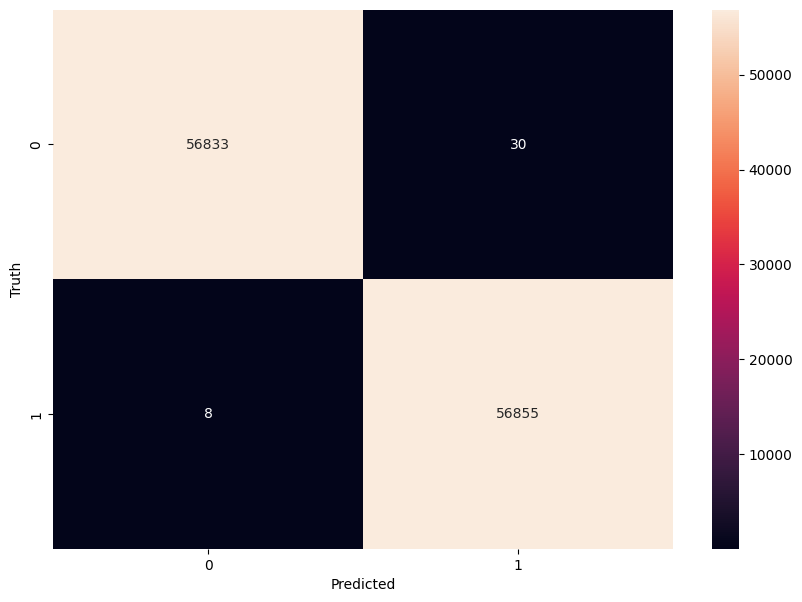

In [ ]:
cm = confusion_matrix(y_test, default_rf_model.predict(x_test))

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## **4. Neural Network MLP**


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

We import the MLPClassifer library with its hyperparameter. The goal of the model is to minimize the cross-entropy loss function during training. Then we import all the necessery libraries for evaluation and creating the model.
We have numpy,pandas, matplotlib is used for data manipulation and analyze process.

In this section, we employ StandardScaler to adjust the scale of the input data to our desired range. We utilize x_train_nor to ensure that other code segments using x_train remain unaffected

In [ ]:
# Reshape and normalize data
scaler = StandardScaler()
x_train_nor = scaler.fit_transform(x_train)
x_val_nor = scaler.transform(x_val)
x_test_nor = scaler.transform(x_test)

### 4.1 Hyperparameter Seletion

**Hyperparameter Tuning**

We use grid search library to find all the combinations possible for different hyperparameters we want to modify

Run time ~ 18 min

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the MLP model
# Define the MLP model with warm_start set to True
mlp = MLPClassifier(random_state=42)

# Define hyperparameters for grid search
parameter_space = {
    #'hidden_layer_sizes': [(50,), (40, 20, 10, 5), (100, 50)],
    'hidden_layer_sizes': [(50,), (40, 20, 10, 5)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.0065, 0.01],
}


# Use GridSearchCV to find the best parameters
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=2, scoring=scoring )#scoring = 'recall' as defined in the beginning
clf.fit(np.concatenate((x_train_nor, x_val_nor)), np.concatenate((y_train, y_val))) #GridSearchCv auot split the data into train and validation K fold so no need to do it manually

# Print the best parameters found by GridSearchCV
# Print the best parameters found by GridSearchCV
print('Best parameters found:\n', clf.best_params_)
print('Best score found:\n', clf.best_score_)

/home/chutrunganh/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/home/chutrunganh/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/home/chutrunganh/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/home/chutrunganh/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/home/chutrunganh/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


KeyboardInterrupt: 

```bash
Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (40, 20, 10, 5), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'solver': 'sgd'}
Best score found:
 1.0
```

### 4.2 Run Model

**Run Model**

Run time ~ 2 min

/home/chutrunganh/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


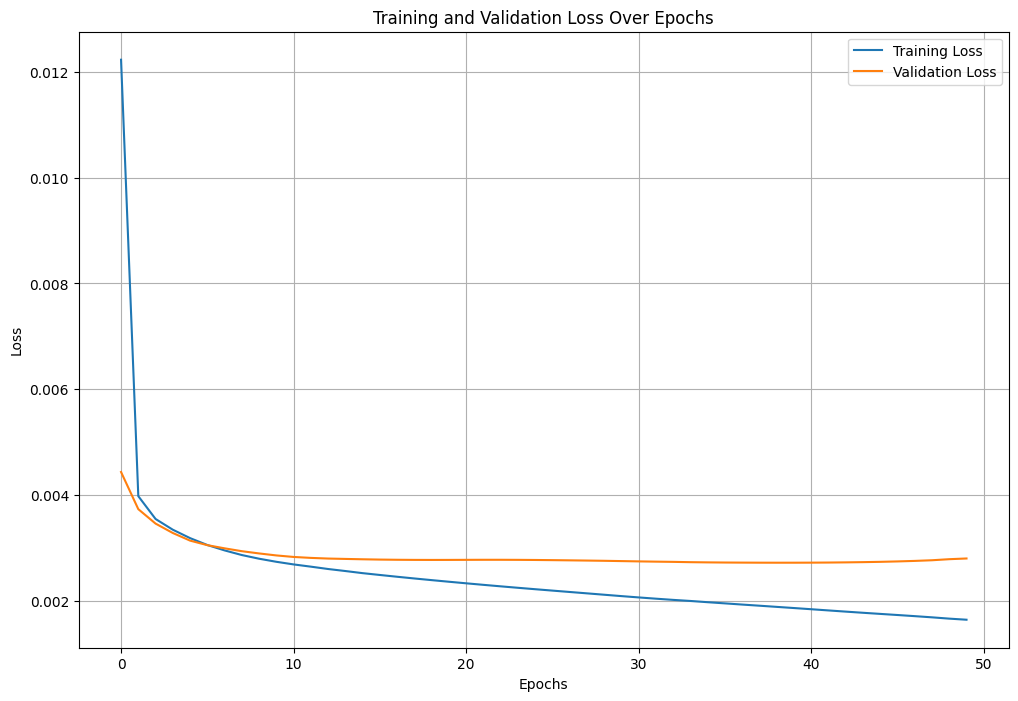


Testing set performance:

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.83      0.84        98

    accuracy                           1.00     56962
   macro avg       0.93      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix: 
 [[56850    14]
 [   17    81]]


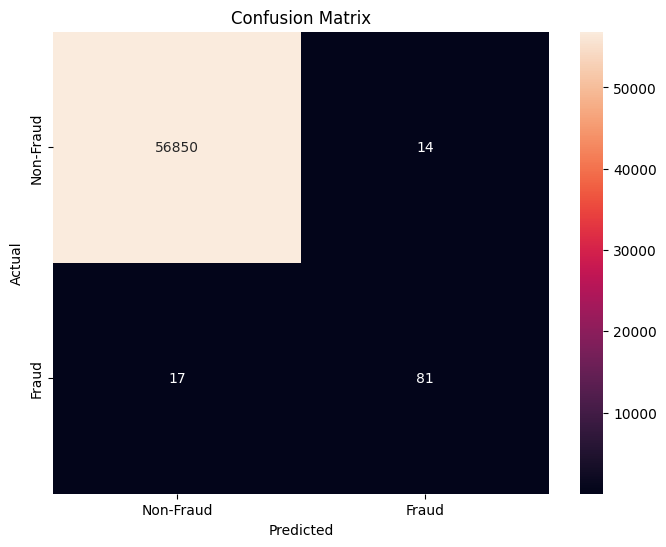

In [ ]:
# Define the MLP model with a specific learning rate
mlp = MLPClassifier( activation='tanh', alpha=0.0001, hidden_layer_sizes=(40, 20, 10, 5), learning_rate='constant', learning_rate_init=0.01, solver='sgd'
                    , random_state=42, max_iter=1, warm_start=True)

# Lists to store training and validation loss
train_loss = []
dev_loss = []

# Train the model for multiple epochs manually to capture loss at each epoch
epochs = 50
for epoch in range(epochs):
    mlp.fit(np.concatenate((x_train_nor, x_val_nor)), np.concatenate((y_train, y_val)))
    train_loss.append(mlp.loss_)
    Y_dev_pred_prob = mlp.predict_proba(x_test_nor)[:, 1]
    dev_loss.append(log_loss(y_test, Y_dev_pred_prob))

# Plot the loss curves
plt.figure(figsize=(12, 8))
plt.plot(range(epochs), train_loss, label='Training Loss')
plt.plot(range(epochs), dev_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    report = classification_report(y, y_pred, zero_division=0)

    print("\nClassification Report:\n", report)
    print("Confusion Matrix: \n", cm)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    return y_pred


# print("Training performance:")
# evaluate_model(mlp, x_train_nor, y_train)

print("\nTesting set performance:")
evaluate_model(mlp, x_test_nor, y_test)

# Add the model to the list of models
models['MLP'] = mlp


----------------------------------------------------------------------------

## **4. Neural Network DNN**

In [ ]:
# Reshape and normalize data
scaler = StandardScaler()
x_train_nor = scaler.fit_transform(x_train)
x_val_nor = scaler.transform(x_val)
x_test_nor = scaler.transform(x_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input
from keras.initializers import GlorotUniform
from keras.initializers import HeNormal
from keras.initializers import LecunNormal

from sklearn.metrics import recall_score, classification_report
print("import complete")

import complete


### **Hyperparameter Tuning**

**Size of the network parameter tuning**

Run Time ~ 10 min (Average each network size take 1.5 min to validate)

/home/chutrunganh/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/chutrunganh/.local/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Network Size: [64, 32]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



/home/chutrunganh/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/chutrunganh/.local/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Network Size: [32, 16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



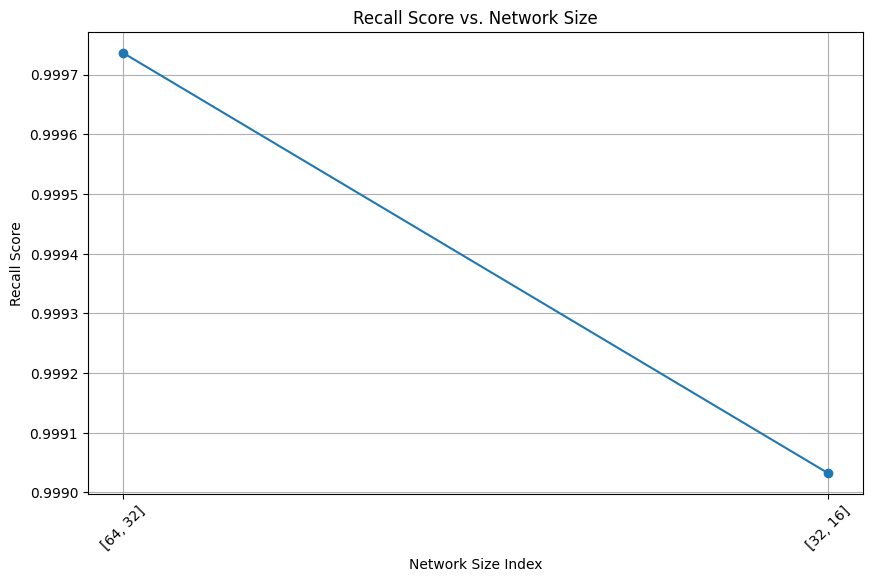

The best network size is: [64, 32]


In [ ]:
# Define the DNN model
def create_model(layers, learning_rate=0.01):
    model = Sequential()
    model.add(Dense(layers[0], input_dim=x_train_nor.shape[1], activation='relu'))
    for units in layers[1:]:
        model.add(Dense(units, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = SGD(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Network sizes to test
network_sizes = [[64,32],[32,16],[64, 32, 16],[64,32,16,8],[128,64,32,16,8],[64,32,16,8,4]]


#----------------------------------
#network_sizes = [[64,32], [32,16]] #Uncomment to reduce test size to save time
#---------------------------------

# Store recall scores
recall_scores = []

# Perform hyperparameter tuning
for layers in network_sizes:
    model = KerasClassifier(model=create_model, layers=layers, learning_rate=0.01, epochs=15, batch_size=32, verbose=0, callbacks=[early_stopping])

    # Train the model
    # model.fit(x_train_nor, y_train, validation_data=(X_dev, Y_dev))
    model.fit(x_train_nor, y_train)

    # Evaluate the model
    # Y_pred = model.predict(x_test_nor)
    Y_pred = model.predict(x_val_nor)

    # Calculate recall score
    recall = recall_score(y_val, Y_pred)
    recall_scores.append(recall)

    # Print classification report
    print(f'Network Size: {layers}')
    print(classification_report(y_val, Y_pred))

# Plot recall scores
plt.figure(figsize=(10, 6))
plt.plot(range(len(network_sizes)), recall_scores, marker='o')
plt.title('Recall Score vs. Network Size')
plt.xlabel('Network Size Index')
plt.ylabel('Recall Score')
plt.xticks(range(len(network_sizes)), [str(x) for x in network_sizes], rotation=45)
plt.grid(True)
plt.show()

# Print the best network size
best_network_size = network_sizes[np.argmax(recall_scores)]
print(f'The best network size is: {best_network_size}')

**Learning rate tuning**

Run Time ~ 7 min (Average each learning rate take 2 min)

/home/chutrunganh/.local/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Learning Rate: 0.001
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56863
           1       0.99      0.97      0.98     56863

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



/home/chutrunganh/.local/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Learning Rate: 0.03
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



/home/chutrunganh/.local/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Learning Rate: 0.1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



/home/chutrunganh/.local/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Learning Rate: 0.2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



/home/chutrunganh/.local/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Learning Rate: 0.3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



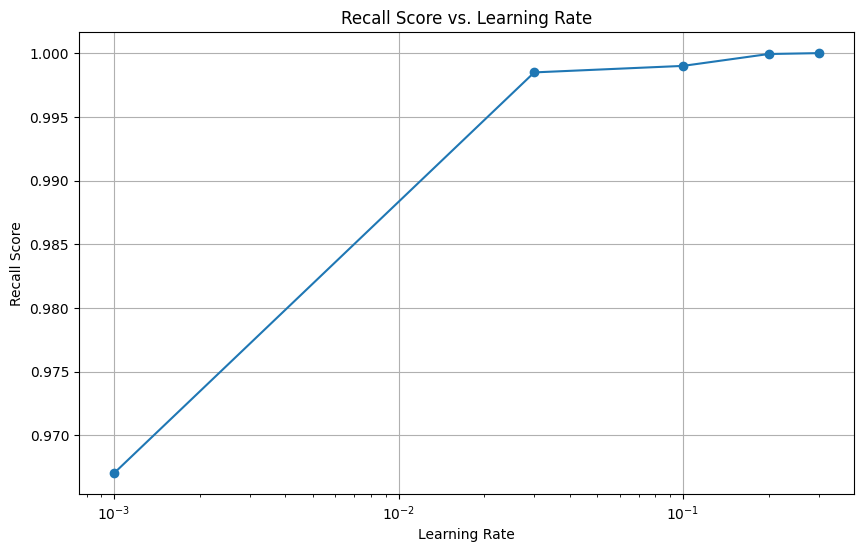

The best learning rate is: 0.3


In [ ]:
# Define the model using the create_model function
def create_model(learning_rate):
    model = Sequential()
    model.add(Input(shape=(x_train_nor.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = SGD(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Learning rates to test
#learning_rates = [0.001,0.005,0.01,0.03,0.05,0.08,0.1,0.2,0.3,0.5]

#----------------------------------
learning_rates = [0.001,0.03,0.1,0.2,0.3] #Uncomment to reduce test size to save time
#---------------------------------

# Store recall scores
recall_scores = []

# Perform hyperparameter tuning
for lr in learning_rates:
    # Create KerasClassifier with the current learning rate
    model = KerasClassifier(model=create_model, learning_rate=lr, epochs=15, batch_size=32, verbose=0, callbacks=[early_stopping])
    # Train the model
    model.fit(x_train_nor, y_train)

    # Evaluate the model
    Y_pred_proba = model.predict(x_val_nor)
    Y_pred = (Y_pred_proba > 0.5).astype(int)

    # Calculate recall score
    recall = recall_score(y_val, Y_pred)
    recall_scores.append(recall)

    # Print classification report
    print(f'Learning Rate: {lr}')
    print(classification_report(y_val, Y_pred))

# Plot recall scores
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, recall_scores, marker='o')
plt.title('Recall Score vs. Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Recall Score')
plt.xscale('log')
plt.grid(True)
plt.show()

# Print the best learning rate
best_lr = learning_rates[np.argmax(recall_scores)]
print(f'The best learning rate is: {best_lr}')

By the hypertuning process, we can point out the best learning rate for our model

**Initial weight tuning**

Run Time ~ 7 min

/home/chutrunganh/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/chutrunganh/.local/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Initial Weights: <keras.src.initializers.random_initializers.GlorotUniform object at 0x727b504e4190>
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     56863
           1       1.00      0.99      0.99     56863

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



/home/chutrunganh/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/chutrunganh/.local/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Initial Weights: <keras.src.initializers.random_initializers.HeNormal object at 0x727bcc3eeef0>
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     56863
           1       1.00      0.99      0.99     56863

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



/home/chutrunganh/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/chutrunganh/.local/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Initial Weights: <keras.src.initializers.random_initializers.LecunNormal object at 0x727bcc3ef010>
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     56863
           1       0.99      0.99      0.99     56863

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



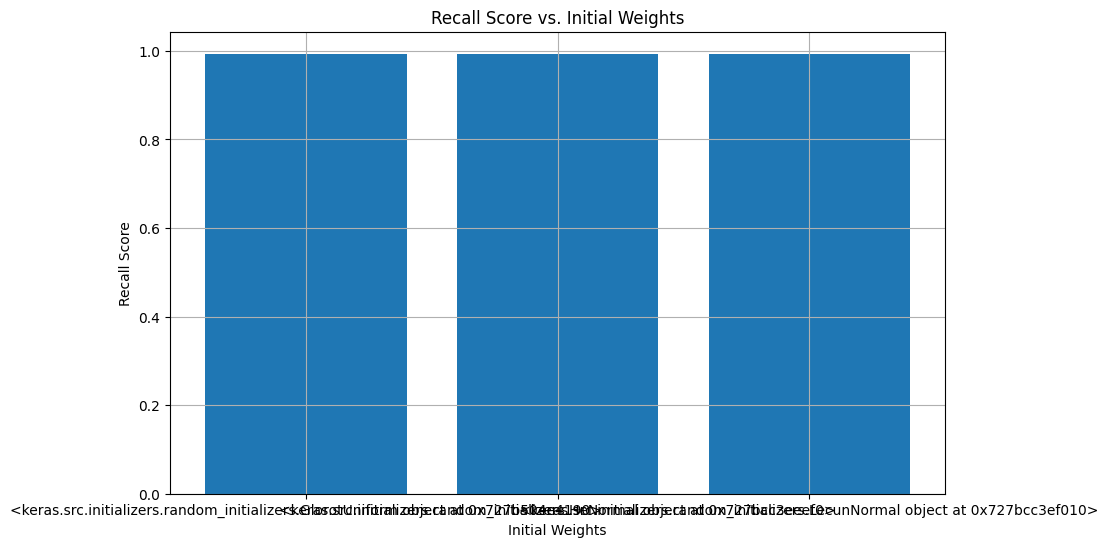

The best initial weights are: <keras.src.initializers.random_initializers.HeNormal object at 0x727bcc3eeef0>


In [ ]:
# Define the DNN model
def create_model(initial_weights, learning_rate=0.01):
    model = Sequential()
    model.add(Dense(16, input_dim=x_train_nor.shape[1], activation='relu', kernel_initializer=initial_weights))
    model.add(Dense(1, activation='sigmoid', kernel_initializer=initial_weights))

    optimizer = SGD(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Initial weights to test
initial_weights_options = [GlorotUniform(), HeNormal(), LecunNormal()]

# Store recall scores
recall_scores = []

# Perform hyperparameter tuning
for initial_weights in initial_weights_options:
    model = KerasClassifier(model=create_model, initial_weights=initial_weights, learning_rate=0.01, epochs=30, batch_size=32, verbose=0, callbacks=[early_stopping])

    # Train the model
    model.fit(x_train_nor, y_train)

    # Evaluate the model
    Y_pred = model.predict(x_val_nor)

    # Calculate recall score
    recall = recall_score(y_val, Y_pred)
    recall_scores.append(recall)

    # Print classification report
    print(f'Initial Weights: {initial_weights}')
    print(classification_report(y_val, Y_pred))

# Plot recall scores
plt.figure(figsize=(10, 6))
plt.bar([str(weights) for weights in initial_weights_options], recall_scores)
plt.title('Recall Score vs. Initial Weights')
plt.xlabel('Initial Weights')
plt.ylabel('Recall Score')
plt.grid(True)
plt.show()

# Print the best initial weights
best_initial_weights = initial_weights_options[np.argmax(recall_scores)]
print(f'The best initial weights are: {best_initial_weights}')

### **Run Model**

Run Time ~ 2 min

/home/chutrunganh/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/chutrunganh/.local/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 748us/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.82      0.82        98

    accuracy                           1.00     56962
   macro avg       0.92      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



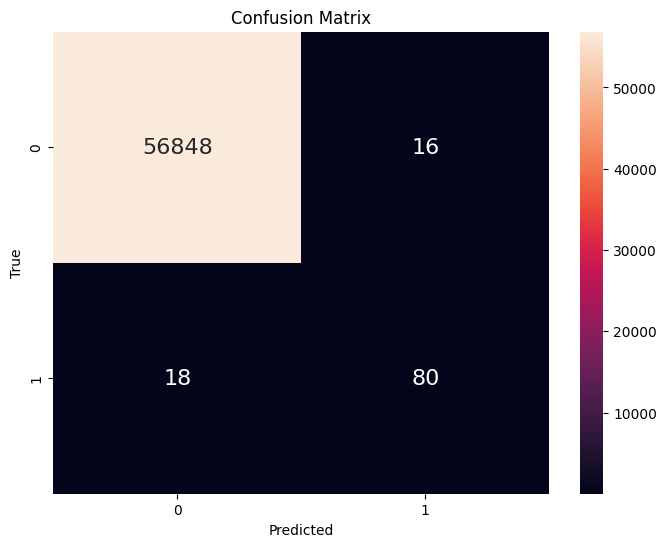

[[56848    16]
 [   18    80]]


In [ ]:
# Define the DNN model with specified parameters
# def create_model():
#     model = Sequential()
#     model.add(Dense(64, input_dim=x_train_nor.shape[1], activation='relu', kernel_initializer=GlorotUniform()))
#     model.add(Dense(32, activation='relu', kernel_initializer=GlorotUniform()))
#     model.add(Dense(16, activation='relu', kernel_initializer=GlorotUniform()))
#     model.add(Dense(1, activation='sigmoid', kernel_initializer=GlorotUniform()))

#     optimizer = SGD(learning_rate=0.01)
#     model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
#     return model

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Create and train the model
# Define the model
model = Sequential()
model.add(Dense(64, input_dim=x_train_nor.shape[1], activation='relu', kernel_initializer=GlorotUniform()))
model.add(Dense(32, activation='relu', kernel_initializer=GlorotUniform()))
model.add(Dense(16, activation='relu', kernel_initializer=GlorotUniform()))
model.add(Dense(1, activation='sigmoid', kernel_initializer=GlorotUniform()))

optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.fit(np.concatenate((x_train_nor, x_val_nor)), np.concatenate((y_train, y_val)), epochs=15, batch_size=48, verbose=0, callbacks=[early_stopping])

# Evaluate the model
Y_pred = model.predict(x_test_nor)
Y_pred = (Y_pred > 0.5).astype(int)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, Y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', annot_kws={'size': 16})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(confusion_matrix(y_test, Y_pred))

# Add the model to the list of models
models["DNN"] = model


## **5. KNN**

For the hyperparameter function, see the java source code included in the zip file

Initializes a KNN classifier with 50 neighbors, distance-based weighting, and the Euclidean distance metric (p=2).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN with specified parameters
knn = KNeighborsClassifier(n_neighbors=50, weights='distance', p=2)

# Fit the model on the training data
knn.fit(np.concatenate((x_train, x_val)), np.concatenate((y_train, y_val)))
models["KNN"] = knn

Show model result

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on test data
y_pred = knn.predict(x_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


/home/chutrunganh/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


KeyboardInterrupt: 

## **6. SVM**


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import RobustScaler
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, recall_score
from imblearn.over_sampling import SMOTE
import random as rd

Due to some incompatibilities with data processing in the SVM section, we need to reload the dataset and process it separately.

In [ ]:
data = pd.read_csv(filePath)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### **6.1 Pre Processing**

In [ ]:
#Transform data
scaler = RobustScaler()
columns = "Time V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21 V22 V23 V24 V25 V26 V27 V28 Amount".split()
for column in columns:
  data[column] = scaler.fit_transform(data[column].values.reshape(-1,1))
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-0.616237,-0.098602,1.228905,0.878152,-0.217859,0.631245,0.177406,0.142432,0.334787,...,0.026866,0.253109,-0.320791,0.032681,0.167619,-0.241182,0.816731,-0.246091,1.783274,0
1,-0.994983,0.524929,0.143100,-0.006970,0.293974,0.087726,0.164395,-0.105740,0.117064,-0.164482,...,-0.473332,-0.602719,0.363442,-0.479557,0.225462,0.313475,-0.063781,0.026519,-0.269825,0
2,-0.994972,-0.615587,-1.002407,0.830932,0.251024,-0.344345,1.778007,0.668164,0.420388,-1.179796,...,0.668917,0.714254,2.974603,-0.919589,-0.515430,-0.153111,-0.350218,-0.540962,4.983721,0
3,-0.994972,-0.440239,-0.178789,0.841250,-0.529808,0.033775,1.303832,0.175637,0.662489,-1.076888,...,-0.190105,-0.001408,-0.578786,-1.531963,0.944482,-0.298959,0.379163,0.382611,1.418291,0
4,-0.994960,-0.526089,0.579239,0.713861,0.265632,-0.270695,0.317183,0.491625,-0.546463,0.700808,...,0.048266,0.739092,-0.407980,0.126293,-0.333308,0.976221,1.347133,1.553716,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.034951,-5.321622,7.135767,-5.222589,-1.285699,-4.073679,-1.999082,-4.409307,13.588260,1.585066,...,0.585633,0.098124,3.314091,-0.693006,2.126512,0.532055,5.820867,6.190862,-0.296653,0
284803,1.034963,-0.335820,-0.085979,0.967471,-0.451476,0.707747,1.142041,-0.014027,0.508439,0.512990,...,0.587444,0.856848,0.076436,-1.331299,-0.933155,-0.604145,0.414680,-0.493534,0.038986,0
284804,1.034975,0.850377,-0.261532,-1.788463,-0.337932,2.059687,2.832770,-0.299623,1.280019,0.390154,...,0.630455,0.533612,-0.085005,0.754500,0.373060,-0.062034,0.019227,-0.288058,0.641096,0
284805,1.034975,-0.115629,0.331602,0.272567,0.445763,-0.248270,0.769496,-0.645865,1.225405,0.357606,...,0.710499,0.740745,-0.491472,0.103549,-0.877058,1.054357,0.663921,0.710829,-0.167680,0


Handle imbalance dataset, choose only one module undersampling or oversampling to run

In [ ]:
#Undersampling
fraud_data = data.loc[data['Class'] == 1]
fraud_number = data['Class'].value_counts()[1]
non_fraud_number = data['Class'].value_counts()[0]
i = rd.randrange(0, non_fraud_number - fraud_number)
non_fraud_data = data.loc[data['Class'] == 0][i:i + fraud_number]
normal_distributed_data = pd.concat([fraud_data, non_fraud_data])
normal_distributed_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-0.990214,-1.042182,1.345320,-0.933320,2.523743,-0.358913,-0.987572,-2.292097,2.554779,-2.192050,...,1.318031,-0.039062,-1.466996,0.351615,0.041814,0.404938,1.604864,-1.177385,-0.307413,1
623,-0.989438,-1.369244,-2.298262,0.473840,1.450074,1.084860,-0.677575,0.253862,-0.168201,-0.177002,...,1.666327,0.400312,4.482102,-0.421576,0.394101,-0.164143,-1.569730,0.186837,7.084469,1
4920,-0.942563,-1.038212,1.207868,-0.281395,1.476204,-0.588630,0.170028,0.464394,-0.786425,-0.150636,...,-0.638221,-0.876991,0.594269,-0.161571,-0.258599,-0.863634,0.236118,-1.251699,3.045204,1
6108,-0.912910,-1.974979,0.921989,-1.445947,1.695769,-0.823764,-1.227524,-3.144742,-0.505873,-0.158308,...,1.453869,0.158918,-1.373279,-0.118973,0.353085,-1.065875,-5.117705,6.387772,0.517013,1
6329,-0.906648,0.543881,2.106760,-2.338619,2.985363,2.821995,-0.928610,1.488061,-0.967799,-0.992899,...,-0.842916,-0.663890,-2.086061,-2.107546,2.204514,1.089799,-0.070163,1.032834,-0.293440,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257757,0.865130,-0.050793,0.595279,0.033798,-0.363691,0.354337,-0.720689,0.863197,-0.499505,0.060683,...,-0.523089,-0.539403,0.371787,-0.035064,-0.759941,0.316556,0.709938,0.606159,-0.235311,0
257758,0.865130,0.819286,-0.282324,-1.158165,0.171385,0.323291,-0.016981,-0.068742,0.071958,0.828503,...,-0.400517,-0.577022,0.401183,0.109498,-0.197838,-0.114208,-0.225987,-0.197782,0.946273,0
257759,0.865130,0.937618,-0.836970,-1.342819,-1.572243,0.146788,-0.261697,-0.014747,-0.714942,0.014485,...,-0.439593,-0.110000,-0.238609,-0.173551,0.457578,-0.122709,-0.192297,-0.529580,1.027038,0
257760,0.865130,-0.330694,-0.335446,-1.236105,-0.027806,-0.648774,0.094466,2.380320,-0.200657,-0.551473,...,1.629267,0.741962,4.571698,0.758639,-0.467022,0.886387,-1.967797,0.055489,8.062600,0


In [ ]:
#Oversampling
y = data['Class']

smote = SMOTE(sampling_strategy='minority')

data_smote, y_smote = smote.fit_resample(data, y)
normal_distributed_data = pd.DataFrame(data_smote, columns=data.columns)
normal_distributed_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-0.616237,-0.098602,1.228905,0.878152,-0.217859,0.631245,0.177406,0.142432,0.334787,...,0.026866,0.253109,-0.320791,0.032681,0.167619,-0.241182,0.816731,-0.246091,1.783274,0
1,-0.994983,0.524929,0.143100,-0.006970,0.293974,0.087726,0.164395,-0.105740,0.117064,-0.164482,...,-0.473332,-0.602719,0.363442,-0.479557,0.225462,0.313475,-0.063781,0.026519,-0.269825,0
2,-0.994972,-0.615587,-1.002407,0.830932,0.251024,-0.344345,1.778007,0.668164,0.420388,-1.179796,...,0.668917,0.714254,2.974603,-0.919589,-0.515430,-0.153111,-0.350218,-0.540962,4.983721,0
3,-0.994972,-0.440239,-0.178789,0.841250,-0.529808,0.033775,1.303832,0.175637,0.662489,-1.076888,...,-0.190105,-0.001408,-0.578786,-1.531963,0.944482,-0.298959,0.379163,0.382611,1.418291,0
4,-0.994960,-0.526089,0.579239,0.713861,0.265632,-0.270695,0.317183,0.491625,-0.546463,0.700808,...,0.048266,0.739092,-0.407980,0.126293,-0.333308,0.976221,1.347133,1.553716,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,0.830346,0.306528,1.872898,-2.659535,3.696494,-0.308830,-1.148251,-2.497375,1.011598,-2.470198,...,0.927113,-0.827020,0.405395,-0.613024,0.196696,-0.154889,4.953634,2.948127,-0.245932,1
568626,-0.485286,-0.518339,0.557412,-0.717124,0.619863,-1.770185,0.144935,-1.480615,0.860002,-0.715982,...,1.626710,0.766730,0.618057,0.028592,-0.407268,1.284002,2.622367,0.554176,2.632385,1
568627,-0.605564,-3.444542,4.756731,-6.768549,4.974356,-8.085374,-0.751376,-8.754148,10.160757,-5.219339,...,4.610967,-0.509677,1.010968,0.039676,-0.406714,-0.145566,3.457761,-2.781189,7.590682,1
568628,-0.049310,-1.503188,2.339529,-2.510660,2.514221,-2.014636,-1.037678,-4.220961,3.295272,-2.532313,...,2.592313,0.158555,-1.158994,-0.423346,0.250334,-0.067910,4.188610,5.063219,0.428052,1


Check the dataset after Pre processing

/tmp/ipykernel_64190/1940561909.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(normal_distributed_data['Class'], sort = True)


Text(0.5, 1.0, 'Equally Distributed Classes')

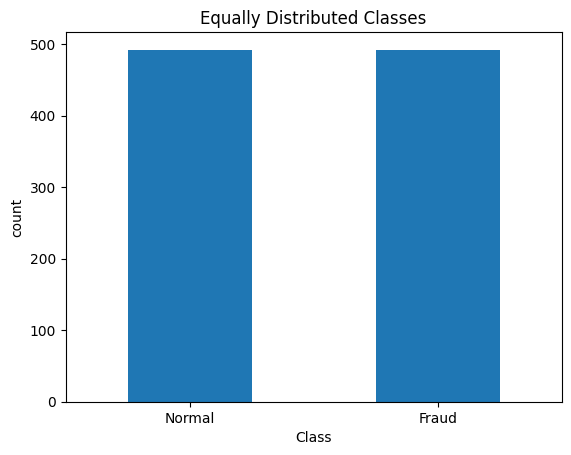

In [ ]:
#Data after undersampling/oversampling
count_classes = pd.value_counts(normal_distributed_data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
labels = ["Normal", "Fraud"]
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("count")
plt.title('Equally Distributed Classes')

Eliminate outliers to simplify the model and prevent overfitting.

In [ ]:
#Remove outliers
for column in columns:
  fraud = normal_distributed_data[column].loc[normal_distributed_data['Class'] == 1].values
  q25, q75 = np.percentile(fraud, 25), np.percentile(fraud, 75)
  print(f'Quartile 25: {q25} | Quartile 75: {q75}')
  iqr = q75 - q25
  print('iqr: {}'.format(iqr))

  cut_off = iqr * 5
  lower, upper = q25 - cut_off, q75 + cut_off
  print(column + ' Cut Off: {}'.format(cut_off))
  print(column + ' Lower: {}'.format(lower))
  print(column + ' Upper: {}'.format(upper))

  outliers = [x for x in fraud if x < lower or x > upper]

  print('Feature ' + column + ' Outliers for Fraud Cases: {}'.format(len(outliers)))
  print(column + ' outliers:{}'.format(outliers))

  normal_distributed_data = normal_distributed_data.drop(normal_distributed_data[(normal_distributed_data[column] > upper) |
                                                                          (normal_distributed_data[column] < lower)].index)

Quartile 25: -0.5104676981637473 | Quartile 75: 0.5144679801219469
iqr: 1.0249356782856942
Time Cut Off: 5.124678391428471
Time Lower: -5.635146089592219
Time Upper: 5.639146371550418
Feature Time Outliers for Fraud Cases: 0
Time outliers:[]
Quartile 25: -2.7075719892726386 | Quartile 75: -0.19557510129042127
iqr: 2.5119968879822174
V1 Cut Off: 12.559984439911087
V1 Lower: -15.267556429183726
V1 Upper: 12.364409338620666
Feature V1 Outliers for Fraud Cases: 0
V1 outliers:[]
Quartile 25: 0.8006569585168081 | Quartile 75: 3.4984407624375224
iqr: 2.6977838039207143
V2 Cut Off: 13.488919019603571
V2 Lower: -12.688262061086764
V2 Upper: 16.987359782041093
Feature V2 Outliers for Fraud Cases: 0
V2 outliers:[]
Quartile 25: -4.601333907657042 | Quartile 75: -1.2808102918571258
iqr: 3.3205236157999165
V3 Cut Off: 16.602618078999583
V3 Lower: -21.203951986656627
V3 Upper: 15.321807787142458
Feature V3 Outliers for Fraud Cases: 0
V3 outliers:[]
Quartile 25: 1.5030929711923984 | Quartile 75: 4.000

In [ ]:
X = normal_distributed_data.drop('Class', axis=1)
y = normal_distributed_data['Class']

#Reduce dimensions

# PCA
t0 = time.time()
X_reduced_pca = PCA(n_components=18, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=18, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

PCA took 0.45 s
Truncated SVD took 0.48 s


Split the X and y to x_train, y_train, x_val, y_val and x_test, y_test

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X is your features and y are your labels
# First split into training and remaining data
x_temp, x_test, y_temp, y_test = train_test_split(X_reduced_svd, y, test_size=0.2, random_state=42)

# Then split remaining data into validation and test sets
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.25, random_state=42)

### **6.2 Model Parameter Selection**

*In this section, we suggest using only Undersampling to address the imbalanced dataset issue, as the Oversampling technique lead to significantly increased training and testing times.*

**Using GirdSearch**

Run Time  > 25 min if using Oversampling technique

In [ ]:
#Parameters to tune
svc_params = {'C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
#svc_params = {'C': [0.01, 0.04,0.07, 0.1, 0.5, 1], 'kernel': [ 'sigmoid', 'linear']} # Reduce validation time
#Classification
grid_svc = GridSearchCV(SVC(), svc_params, scoring = 'recall', cv=2)
grid_svc.fit(np.concatenate((x_train, x_val)), np.concatenate((y_train, y_val)))
svc = grid_svc.best_estimator_
svc

: 

: 

**Using visualize**

Choosing optimal kernal function

Run Time ~

rbf


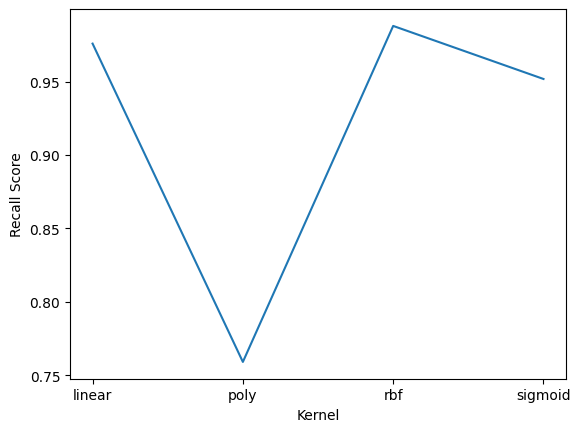

In [ ]:
#Kernel tuning
recall_list = []
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']
for k in kernel_list:
  model = SVC(C= 0.5, kernel = k)
  model.fit(x_train, y_train)
  recall_list.append(recall_score(y_val, model.predict(x_val)))

fig, ax1 = plt.subplots()

color = 'blue'
ax1.set_xlabel('Kernel')
ax1.set_ylabel('Recall Score')
ax1.plot(kernel_list, recall_list)
ax1.tick_params(axis='y')

for score in range(len(recall_list)):
  if recall_list[score] == max(recall_list):
    break
best_kernel = kernel_list[score]
print(best_kernel)

Choosing optimal Regulization value

Run Time ~

0.07


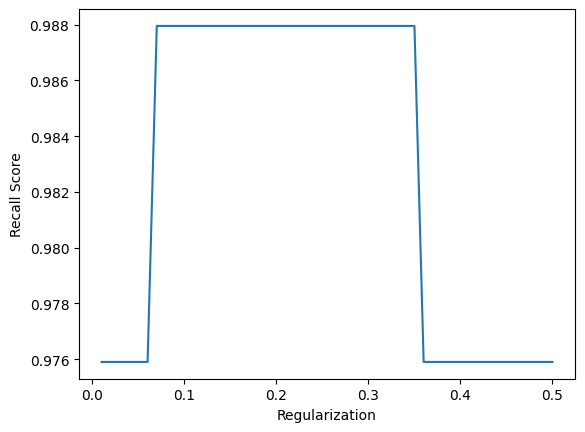

In [ ]:
#Regularization tuning
recall_list = []
regularization_list = []
for i in range(1,51):
  regularization_list.append(i/100)
for r in regularization_list:
  model = SVC(C= r, kernel = 'linear')
  model.fit(x_train, y_train)
  recall_list.append(recall_score(y_val, model.predict(x_val)))

fig, ax1 = plt.subplots()

color = 'blue'
ax1.set_xlabel('Regularization')
ax1.set_ylabel('Recall Score')
ax1.plot(regularization_list, recall_list)
ax1.tick_params(axis='y')

for score in range(len(recall_list)):
  if recall_list[score] == max(recall_list):
    break
best_regularization = regularization_list[score]
print(best_regularization)


Choosing optimal Gamma value

Run Time ~

0.1


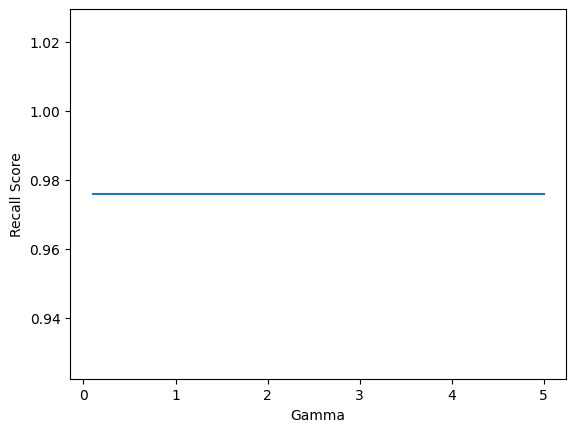

In [ ]:
#Gamma tuning
recall_list = []
gamma_list = []
for i in range(1,51):
  gamma_list.append(i/10)
for g in gamma_list:
  model = SVC(C= 0.5, kernel = 'linear', gamma = g)
  model.fit(x_train, y_train)
  recall_list.append(recall_score(y_val, model.predict(x_val)))

fig, ax1 = plt.subplots()

color = 'blue'
ax1.set_xlabel('Gamma')
ax1.set_ylabel('Recall Score')
ax1.plot(gamma_list, recall_list)
ax1.tick_params(axis='y')

for score in range(len(recall_list)):
  if recall_list[score] == max(recall_list):
    break
best_gamma = gamma_list[score]
print(best_gamma)

### **6.3 Run Model**

Train SVM with optimal hyperparameter

In [ ]:
from sklearn.svm import SVC

# Initialize SVM with specified parameters
svc = SVC(C=0.08, kernel='linear')

# Fit the model on the training data
svc.fit(np.concatenate((x_train, x_val)), np.concatenate((y_train, y_val)))

# Add the model to the list of models
models["SVM"] = svc

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        97
           1       1.00      0.98      0.99        84

    accuracy                           0.99       181
   macro avg       0.99      0.99      0.99       181
weighted avg       0.99      0.99      0.99       181



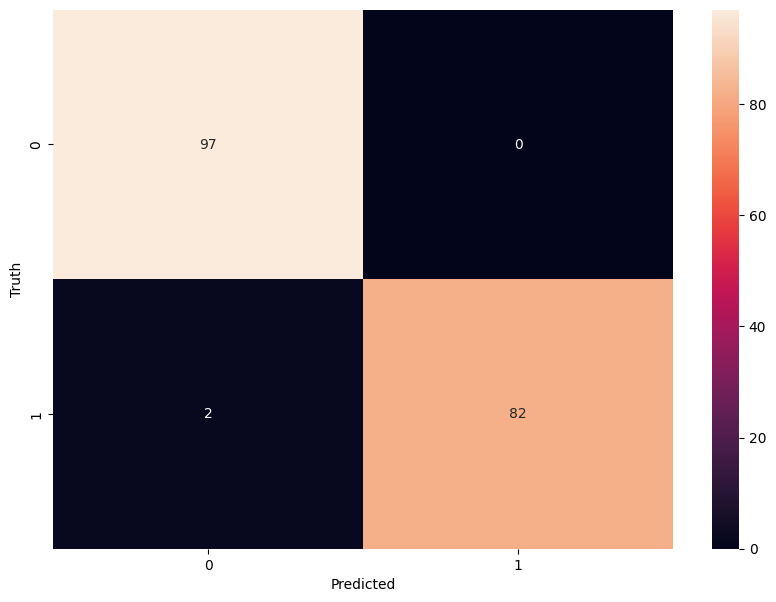

In [ ]:
result = svc.predict(x_test)

#Result
print(classification_report(y_test, result))


# Confusion matrix
cm = confusion_matrix(y_test, result)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


# **VI. Model Assignment**

Ensure that all required models are included in the list. If any are missing, rerun the corresponding code to run them in the Run Model section. The list should contain seven models in total:

- Logistic Regression (LR),
- Decision Tree (DT)
- Random Forest (RF)
- Multilayer Perceptron (MLP),
- Deep Neural Network (DNN),
- K-Nearest Neighbors (KNN),
- Support Vector Machine (SVM),


In [ ]:
for name in models.keys():
    print(f"Model: {name}")
    print()

Model: LR

Model: DT

Model: RF

Model: MLP

Model: DNN

Model: KNN

Model: SVM



Store all model in models list to external disk for reusing

In [ ]:
import pickle
import os

# Create directory if it doesn't exist
if not os.path.exists('ModelStore'):
    os.makedirs('ModelStore')

# Save the models to disk
for name, model in models.items():
    filename = f'ModelStore/{name}.sav'
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

In [ ]:
# try to read the model from disk
loaded_model = pickle.load(open('ModelStore/LR.sav', 'rb'))

# Evaluate the loaded model
print("Loaded Model:")
print(classification_report(y_test, loaded_model.predict(x_test)))

Loaded Model:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     56863
           1       0.97      0.95      0.96     56863

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



/home/chutrunganh/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
# Loaf the models dictionary

models = {
    'LR': pickle.load(open('ModelStore/LR.sav', 'rb')),
    'DT': pickle.load(open('ModelStore/DT.sav', 'rb')),
    'RF': pickle.load(open('ModelStore/RF.sav', 'rb')),
    'MLP': pickle.load(open('ModelStore/MLP.sav', 'rb')),
    'DNN': pickle.load(open('ModelStore/DNN.sav', 'rb')),
    'KNN': pickle.load(open('ModelStore/KNN.sav', 'rb')),
    'SVM' : pickle.load(open('ModelStore/SVM.sav', 'rb'))
}


In [ ]:
#Test the loaded models
print(classification_report(y_test, models['LR'].predict(x_test)))

/home/chutrunganh/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


KeyboardInterrupt: 

Load  new dataset to envaluate all model

In [ ]:
filePaths = "Dataset/creditcard_2023.csv"
df = pd.read_csv(filePaths)
X = df.drop('Class', axis=1)
y = df['Class']

Each separate models should be able to run and work correctly as we tested, but we are still facing compatibility problems between models:

- SVM: This model includes an outlier removal part, which makes its input vector different from those of other models.
    
- MLP and DNN: These models use the Keras library, which has some compatibility issues with Sklearn functions when calculating errors, complicating the process of plotting a summary graph for all models in one place.

Therefore, we will temporarily present the summary table of accuracy, recall, precision, and F1 scores for all models here. Please note that everything below the Working section may not function correctly.

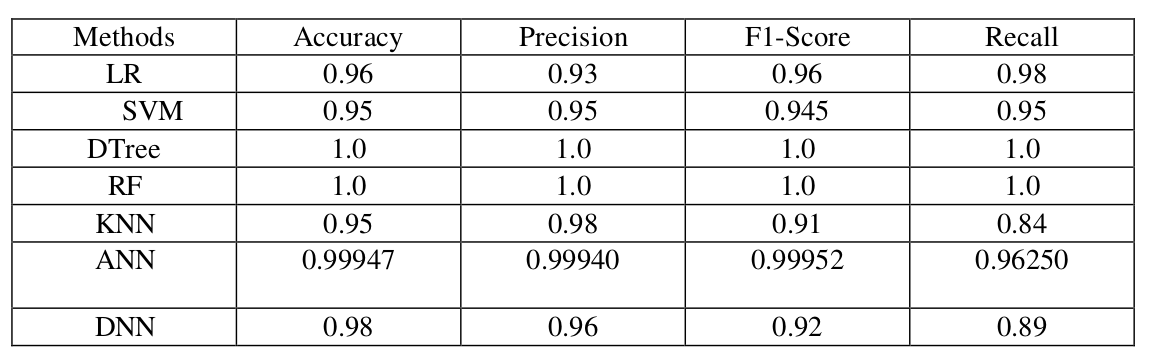

Plot the Bar Graph Error (Run time ~ 4 min)

Since SVM handles outlier processing, it requires fewer features compared to other models. Therefore, we will temporarily exclude it.

In [ ]:
# Remove 'SVM' from the dictionary
svm_model = models.pop('SVM', None)

/home/chutrunganh/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/chutrunganh/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/chutrunganh/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/chutrunganh/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


17770/17770 ━━━━━━━━━━━━━━━━━━━━ 7s 388us/step


/home/chutrunganh/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


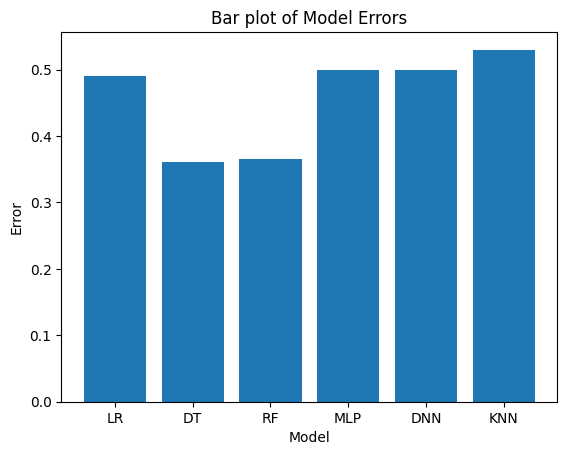

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Assuming X_test is your test data and y_test are the true labels
errors = {}
for name, model in models.items():
    predictions = model.predict(X)
    error = mean_squared_error(y, predictions)
    errors[name] = error


# Create boxplot
plt.bar(errors.keys(), errors.values())
plt.title('Bar plot of Model Errors')
plt.xlabel('Model')
plt.ylabel('Error')
plt.show()

Learning Curve for Logistic Regression

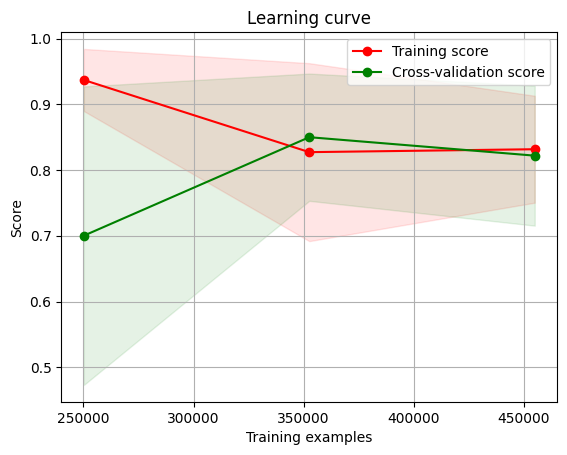

Learning Curve for Decision Tree

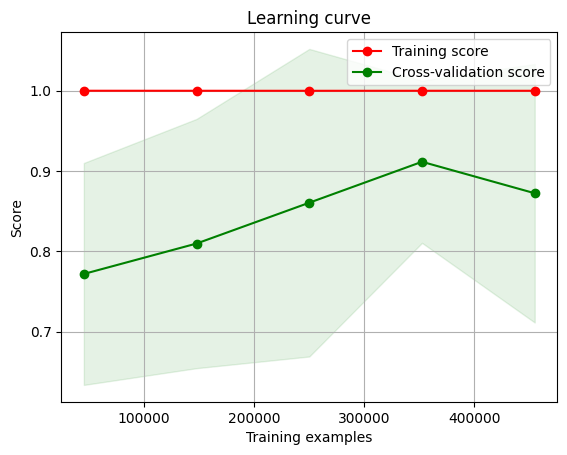

Learning Curve for random Forest

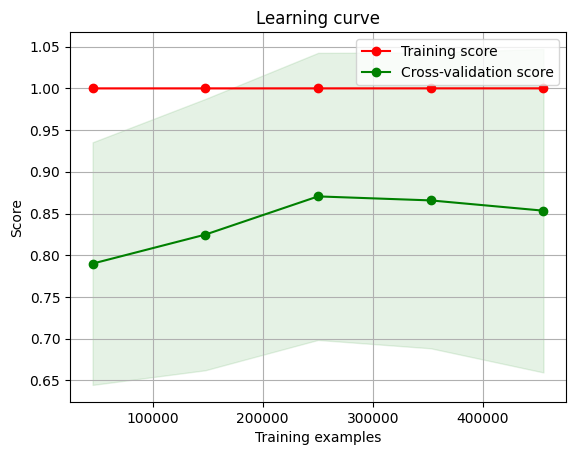

Learning Curve for MLP

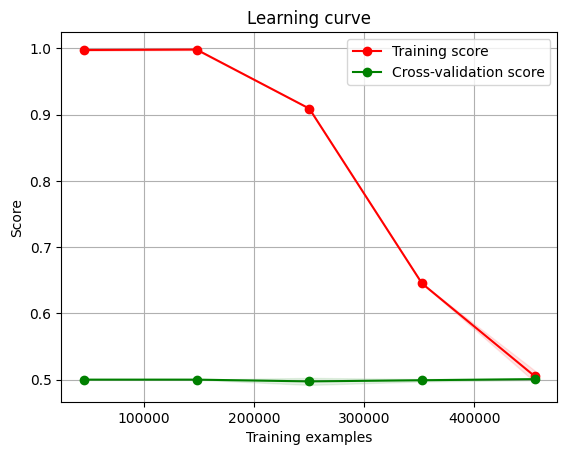

## **Working...**

**Some code here will not work or work but not as expected**

Plot the Box Graph Error

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Wrap your model with KerasClassifier or KerasRegressor
models['DNN'] = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10)

# Assuming X and y are your data and labels
errors = {name: [] for name in models.keys()}
for name, model in models.items():
    cv_errors = -cross_val_score(model, X, y, cv=2, scoring='neg_mean_squared_error')
    errors[name].extend(cv_errors)

# Create boxplot
plt.boxplot(errors.values(), labels=errors.keys())
plt.title('Boxplot of Model Errors')
plt.ylabel('Error')
plt.show()

Epoch 1/10


/home/chutrunganh/.local/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/chutrunganh/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28432/28432 ━━━━━━━━━━━━━━━━━━━━ 16s 537us/step - accuracy: 0.5011 - loss: 79647948800.0000
Epoch 2/10
13540/28432 ━━━━━━━━━━━━━━━━━━━━ 7s 527us/step - accuracy: 0.5012 - loss: 0.6932

KeyboardInterrupt: 

Neural Networks (MLP)

Box Plot

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, recall_score, accuracy_score, precision_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier
from sklearn.neural_network import MLPClassifier

# Load dataset
credit_card_data = pd.read_csv('/content/drive/MyDrive/Final/creditcard_2023.csv')

# Data preprocessing
columns = "id V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21 V22 V23 V24 V25 V26 V27 V28 Amount".split()
X = credit_card_data[columns].values
Y = credit_card_data['Class'].values

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.06, random_state=42)
X_test, X_dev, Y_test, Y_dev = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)

# Rescale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_dev = scaler.transform(X_dev)
X_test = scaler.transform(X_test)

# Define the DNN model
def create_model(learning_rate=0.01):
    model = Sequential()
    model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = SGD(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Optimized Learning rates to test
learning_rates = [0.001, 0.01, 0.1]

# Store recall scores for DNN
dnn_recall_scores = []

# Perform hyperparameter tuning for DNN
for lr in learning_rates:
    # Create KerasClassifier with the current learning rate
    model = KerasClassifier(model=create_model, learning_rate=lr, epochs=10, batch_size=32, verbose=0, callbacks=[early_stopping])

    # Train the model
    model.fit(X_train, Y_train, validation_data=(X_dev, Y_dev))

    # Evaluate the model
    Y_pred = model.predict(X_test)

    # Calculate recall score
    recall = recall_score(Y_test, Y_pred)
    dnn_recall_scores.append(recall)

    # Print classification report
    print(f'Learning Rate: {lr}')
    print(classification_report(Y_test, Y_pred))

    # Print confusion matrix
    print(f'Confusion Matrix for Learning Rate {lr}:')
    print(confusion_matrix(Y_test, Y_pred))

# Print the best learning rate
best_lr = learning_rates[np.argmax(dnn_recall_scores)]
print(f'The best learning rate is: {best_lr}')

# Train the best DNN model
best_dnn_model = KerasClassifier(model=create_model, learning_rate=best_lr, epochs=30, batch_size=32, verbose=0, callbacks=[early_stopping])
best_dnn_model.fit(X_train, Y_train, validation_data=(X_dev, Y_dev))

# Evaluate the best DNN model
Y_dnn_pred = best_dnn_model.predict(X_test)
dnn_recall = recall_score(Y_test, Y_dnn_pred)
dnn_errors = 1 - dnn_recall

# Define the MLP model with a specific learning rate for ANN
mlp = MLPClassifier(hidden_layer_sizes=(40, 20, 10, 5), activation='relu', solver='adam', alpha=0.05,
                    learning_rate='adaptive', learning_rate_init=0.001, random_state=42, max_iter=50, warm_start=True)

# Train the model for multiple epochs manually to capture loss at each epoch
mlp.fit(X_train, Y_train)

# Evaluate the ANN model
Y_ann_pred = mlp.predict(X_test)
ann_recall = recall_score(Y_test, Y_ann_pred)
ann_errors = 1 - ann_recall

# Create a DataFrame to store the errors
data = {
    'Model': ['DNN', 'ANN'],
    'Error': [dnn_errors, ann_errors]
}
df_errors = pd.DataFrame(data)

# Plot the box plot for errors
plt.figure(figsize=(12, 8))
sns.boxplot(x='Model', y='Error', data=df_errors)
plt.title('Comparison of Model Errors')
plt.xlabel('Model')
plt.ylabel('Error')
plt.show()

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)

    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC AUC Score: {roc_auc:.2f}")

# Evaluate DNN model
evaluate_model(Y_test, Y_dnn_pred, "DNN")

# Evaluate ANN model
evaluate_model(Y_test, Y_ann_pred, "ANN")

**Learning Cureve**

https://www.dataquest.io/blog/learning-curves-machine-learning/

https://stackoverflow.com/questions/54621429/what-does-the-learning-curve-in-classification-decision-tree-mean

Learning curve for LR 



/home/chutrunganh/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/chutrunganh/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

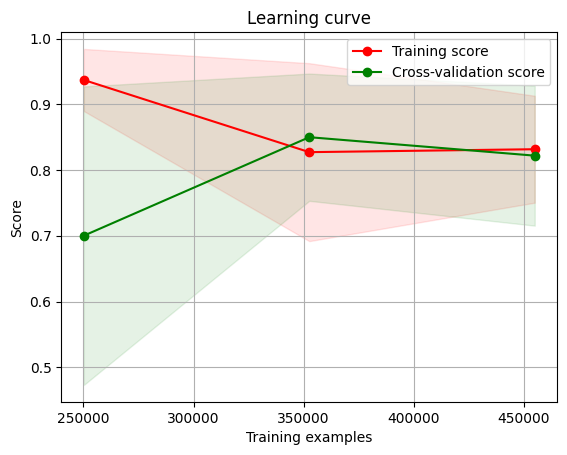

Learning curve for DT 



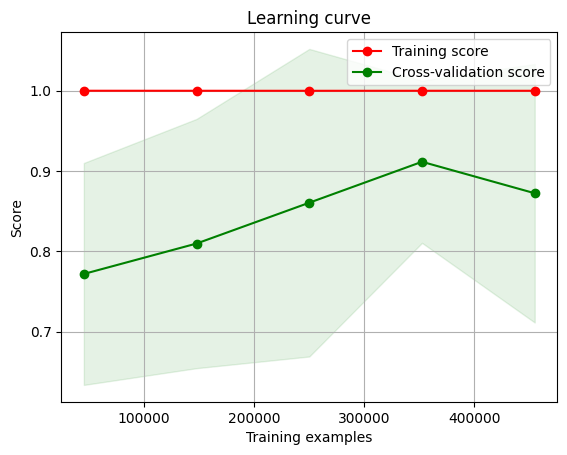

Learning curve for RF 



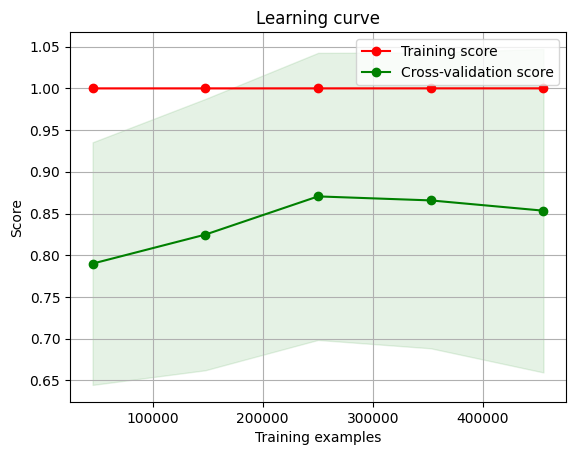

Learning curve for MLP 



/home/chutrunganh/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chutrunganh/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chutrunganh/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chutrunganh/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chutrunganh/.local/lib/python3

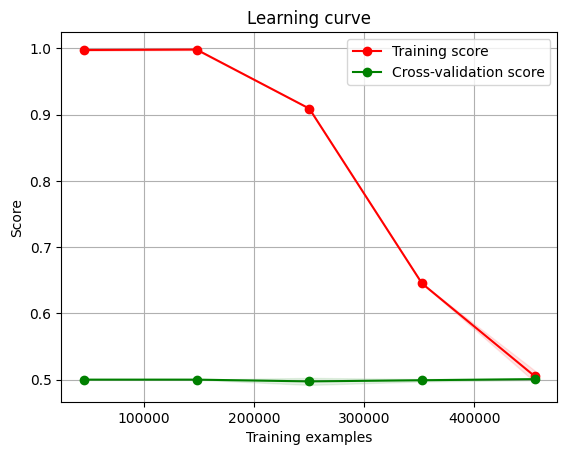

Learning curve for DNN 



TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <Sequential name=sequential, built=True> does not.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Learning curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")

    plt.show()

# Use the function with your model
for name, model in models.items():
    print(f"Learning curve for {name} \n")
    plot_learning_curve(model, X, y) # use entire dataset